In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import numpy as np

## Reading in data

In [2]:
df = pd.read_csv('../datasets/processed/arrests2025_cleaned.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
0,298799078,2025-01-02 00:00:00.000000000,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,...,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44,Thursday,January
1,299008265,2025-01-07 00:00:00.000000000,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,...,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64,Tuesday,January
2,298969999,2025-01-06 00:00:00.000000000,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,5,...,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44,Monday,January
3,299436365,2025-01-14 00:00:00.000000000,157,RAPE 1,104.0,RAPE,PL 130352B,F,Q,112,...,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64,Tuesday,January
4,299562518,2025-01-16 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,M,26,...,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17,Thursday,January


## Cleaning Values

In [3]:
# Making the Borough name Accurate
borough_mapping = {
    'B': 'Bronx',
    'K': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
    'S': 'Staten Island'
}

df['ARREST_BORO'] = df['ARREST_BORO'].map(borough_mapping)
df['ARREST_BORO'].value_counts()

ARREST_BORO
Brooklyn         20024
Manhattan        17067
Bronx            15776
Queens           15154
Staten Island     3007
Name: count, dtype: int64

In [4]:
# Making the Law Code name Accurate
borough_mapping = {
    'F': 'Felony',
    'M': 'Misdemeanor',
    'V': 'Violation'
}

df['LAW_CAT_CD'] = df['LAW_CAT_CD'].map(borough_mapping)
df['LAW_CAT_CD'].value_counts()

LAW_CAT_CD
Misdemeanor    41809
Felony         27597
Violation        960
Name: count, dtype: int64

In [5]:
gender_mapping = {
    'M': 'Male',
    'F': 'Female'
}
df['PERP_SEX'] = df['PERP_SEX'].map(gender_mapping)
df['PERP_SEX'].value_counts()

PERP_SEX
Male      58528
Female    12500
Name: count, dtype: int64

In [6]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
0,298799078,2025-01-02 00:00:00.000000000,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Manhattan,23,...,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44,Thursday,January
1,299008265,2025-01-07 00:00:00.000000000,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,Felony,Queens,113,...,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64,Tuesday,January
2,298969999,2025-01-06 00:00:00.000000000,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,Felony,Manhattan,5,...,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44,Monday,January
3,299436365,2025-01-14 00:00:00.000000000,157,RAPE 1,104.0,RAPE,PL 130352B,Felony,Queens,112,...,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64,Tuesday,January
4,299562518,2025-01-16 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,Felony,Manhattan,26,...,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17,Thursday,January


In [7]:
# Categorical Ordering
desired_order = ['<18', '18-24', '25-44', '45-64', '65+']
month_order = ['January', 'February', 'March']
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
borough_order = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
law_order = ['Felony', 'Misdemeanor', 'Violation' ]
gender_order = ['Male', 'Female']

df['AGE_GROUP'] = pd.Categorical(df['AGE_GROUP'], categories=desired_order, ordered=True)
df['MONTH'] = pd.Categorical(df['MONTH'], categories=month_order, ordered=True)
df['DAY_OF_WEEK'] = pd.Categorical(df['DAY_OF_WEEK'], categories=day_order, ordered=True)
df['ARREST_BORO'] = pd.Categorical(df['ARREST_BORO'], categories=borough_order, ordered=True)
df['LAW_CAT_CD'] = pd.Categorical(df['LAW_CAT_CD'], categories=law_order, ordered=True)
df['PERP_SEX'] = pd.Categorical(df['PERP_SEX'], categories=gender_order, ordered=True)

df.sort_values(['ARREST_BORO','MONTH', 'DAY_OF_WEEK', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_SEX'])

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
6479,298916393,2025-01-05 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,Felony,Bronx,49,...,BLACK HISPANIC,1019581,245907,40.841573,-73.872310,POINT (-73.87231 40.841573),0,17,Sunday,January
6554,299710201,2025-01-19 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,Felony,Bronx,47,...,BLACK,1022324,259342,40.878434,-73.862319,POINT (-73.862319 40.878434),0,17,Sunday,January
6861,299710203,2025-01-19 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,Felony,Bronx,47,...,BLACK,1022324,259342,40.878434,-73.862319,POINT (-73.862319 40.878434),0,17,Sunday,January
9643,298939027,2025-01-05 00:00:00.000000000,405,"LARCENY,GRAND BY THEFT OF CREDIT CARD",109.0,GRAND LARCENY,PL 1553010,Felony,Bronx,48,...,BLACK,1015230,251084,40.855798,-73.888009,POINT (-73.888009 40.855798),0,17,Sunday,January
19008,299695864,2025-01-19 00:00:00.000000000,268,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,Felony,Bronx,47,...,WHITE HISPANIC,1021972,265517,40.895376,-73.863557,POINT (-73.86355749899745 40.895375906917266),0,17,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50354,302289073,2025-03-08 00:00:00.000000000,922,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,Misdemeanor,Staten Island,120,...,WHITE,962541,163515,40.615461,-74.078193,POINT (-74.07819332308526 40.61546069195117),45,64,Saturday,March
51562,301897951,2025-03-01 00:00:00.000000000,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Staten Island,122,...,WHITE,954771,148450,40.574099,-74.106114,POINT (-74.106114 40.574099),45,64,Saturday,March
52319,302873212,2025-03-15 00:00:00.000000000,511,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Staten Island,121,...,BLACK,938125,170979,40.635854,-74.166188,POINT (-74.166187798588 40.635854305948776),65,99,Saturday,March
56800,303837246,2025-03-29 00:00:00.000000000,637,"HARASSMENT,SUBD 1,CIVILIAN",578.0,HARRASSMENT 2,PL 2402601,Violation,Staten Island,121,...,BLACK,942827,166373,40.623246,-74.149218,POINT (-74.149218 40.623246),25,44,Saturday,March


In [8]:
conditions = [
    df['JURISDICTION_CODE'] == 0,
    df['JURISDICTION_CODE'] == 1,
    df['JURISDICTION_CODE'] == 2,
    df['JURISDICTION_CODE'] >= 3
]

choices = [
    'Patrol (NYPD)',
    'Transit (NYPD)',
    'Housing (NYPD)',
    'Other Non-NYPD'
]

df['JURISDICTION_DESC'] = np.select(conditions, choices, default='Unknown Jurisdiction')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH,JURISDICTION_DESC
0,298799078,2025-01-02 00:00:00.000000000,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Manhattan,23,...,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44,Thursday,January,Patrol (NYPD)
1,299008265,2025-01-07 00:00:00.000000000,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,Felony,Queens,113,...,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64,Tuesday,January,Patrol (NYPD)
2,298969999,2025-01-06 00:00:00.000000000,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,Felony,Manhattan,5,...,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44,Monday,January,Other Non-NYPD
3,299436365,2025-01-14 00:00:00.000000000,157,RAPE 1,104.0,RAPE,PL 130352B,Felony,Queens,112,...,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64,Tuesday,January,Patrol (NYPD)
4,299562518,2025-01-16 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,Felony,Manhattan,26,...,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17,Thursday,January,Patrol (NYPD)


## Top 5 Offense Filtering

In [9]:
# top 5 filtering
top5 = [
    "ASSAULT 3 & RELATED OFFENSES",
    "PETIT LARCENY",
    "DANGEROUS DRUGS",
    "FELONY ASSAULT",
    "MISCELLANEOUS PENAL LAW"
]

df_adjusted = df[df['OFNS_DESC'].isin(top5)]

## Reordering

In [10]:
final_column_order = [
    'ARREST_DATE',
    'ARREST_BORO', 
    'OFNS_DESC', 
    'LAW_CAT_CD', 
    'MONTH',
    'DAY_OF_WEEK',
    'ARREST_PRECINCT',
    'JURISDICTION_CODE', 
    'JURISDICTION_DESC',
    'AGE_GROUP', 
    'MIN_AGE',
    'MAX_AGE',  
    'PERP_SEX', 
    'PERP_RACE',
    'Latitude',
    'Longitude'
]

df_adjusted = df_adjusted[final_column_order]
df_adjusted.head()

,ARREST_DATE,ARREST_BORO,OFNS_DESC,LAW_CAT_CD,MONTH,DAY_OF_WEEK,ARREST_PRECINCT,JURISDICTION_CODE,JURISDICTION_DESC,AGE_GROUP,MIN_AGE,MAX_AGE,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2025-01-02 00:00:00.000000000,Manhattan,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,January,Thursday,23,0,Patrol (NYPD),25-44,25,44,Female,BLACK,40.794755,-73.942348
1,2025-01-07 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Tuesday,113,0,Patrol (NYPD),45-64,45,64,Male,BLACK,40.680086,-73.775931
5,2025-01-19 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Sunday,113,0,Patrol (NYPD),18-24,18,24,Male,BLACK,40.680086,-73.775931
6,2025-01-21 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Tuesday,101,0,Patrol (NYPD),45-64,45,64,Female,BLACK,40.589791,-73.788678
9,2025-02-05 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,February,Wednesday,103,0,Patrol (NYPD),25-44,25,44,Male,BLACK,40.707447,-73.792141


In [11]:
final_cols = ['ARREST_BORO', 'OFNS_DESC', 'LAW_CAT_CD', 'MONTH', 'DAY_OF_WEEK', 'AGE_GROUP', 'PERP_SEX','PERP_RACE']
df_adjusted.sort_values(final_cols)

,ARREST_DATE,ARREST_BORO,OFNS_DESC,LAW_CAT_CD,MONTH,DAY_OF_WEEK,ARREST_PRECINCT,JURISDICTION_CODE,JURISDICTION_DESC,AGE_GROUP,MIN_AGE,MAX_AGE,PERP_SEX,PERP_RACE,Latitude,Longitude
10566,2025-01-22 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Felony,January,Wednesday,48,0,Patrol (NYPD),25-44,25,44,Male,BLACK,40.844152,-73.900500
3572,2025-01-01 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Felony,January,Wednesday,42,0,Patrol (NYPD),25-44,25,44,Male,WHITE HISPANIC,40.826141,-73.901079
69575,2025-03-10 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Felony,March,Monday,49,0,Patrol (NYPD),25-44,25,44,Male,BLACK,40.846881,-73.868927
18791,2025-01-26 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,January,Sunday,43,0,Patrol (NYPD),<18,0,17,Male,BLACK,40.816871,-73.850684
15126,2025-01-05 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,January,Sunday,43,2,Housing (NYPD),<18,0,17,Male,BLACK HISPANIC,40.819639,-73.843450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29400,2025-03-01 00:00:00.000000000,Staten Island,PETIT LARCENY,Misdemeanor,March,Saturday,122,0,Patrol (NYPD),45-64,45,64,Female,WHITE,40.574099,-74.106114
39750,2025-03-01 00:00:00.000000000,Staten Island,PETIT LARCENY,Misdemeanor,March,Saturday,122,0,Patrol (NYPD),45-64,45,64,Female,WHITE,40.574099,-74.106114
46601,2025-03-22 00:00:00.000000000,Staten Island,PETIT LARCENY,Misdemeanor,March,Saturday,122,0,Patrol (NYPD),45-64,45,64,Female,WHITE,40.598236,-74.082761
47764,2025-03-01 00:00:00.000000000,Staten Island,PETIT LARCENY,Misdemeanor,March,Saturday,121,0,Patrol (NYPD),45-64,45,64,Female,WHITE,40.580286,-74.163176


## Categorical Plotting

In [12]:
sns.set_theme()

In [13]:
categorical_cols = [col for col in df_adjusted.columns if df_adjusted[col].dtype == 'object' or df_adjusted[col].dtype.name == 'category']

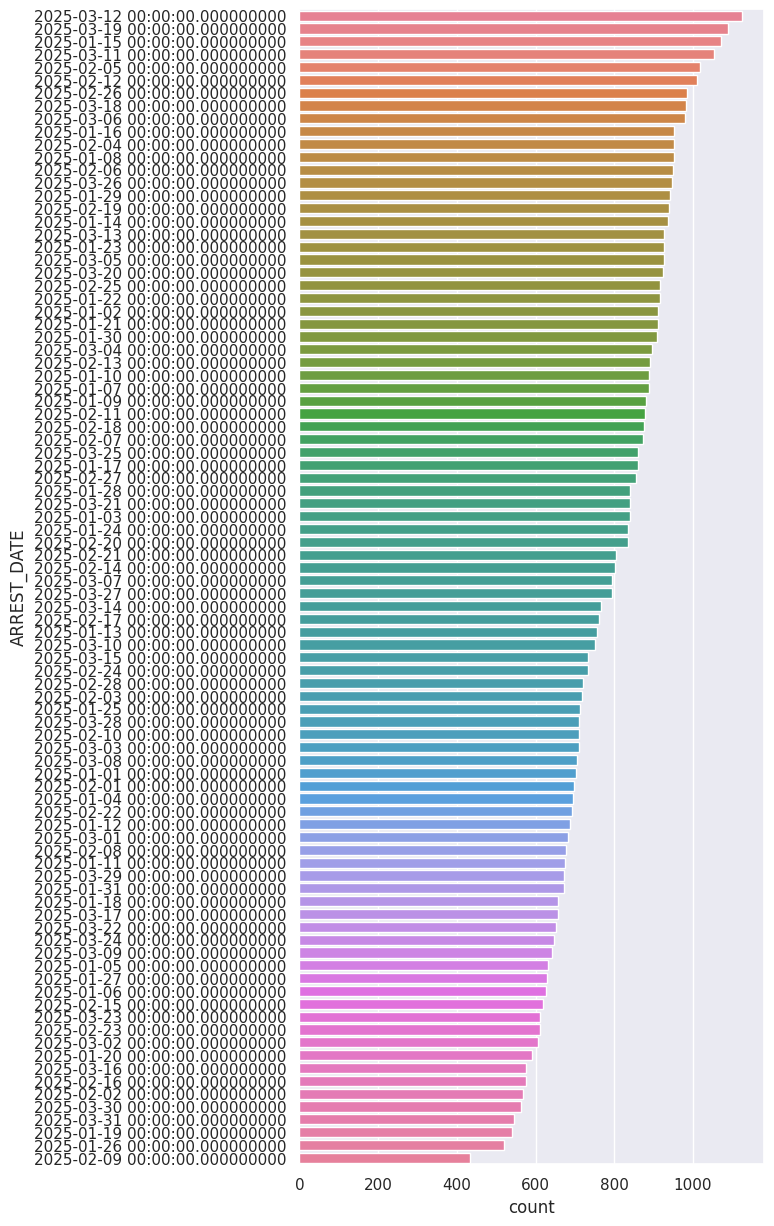

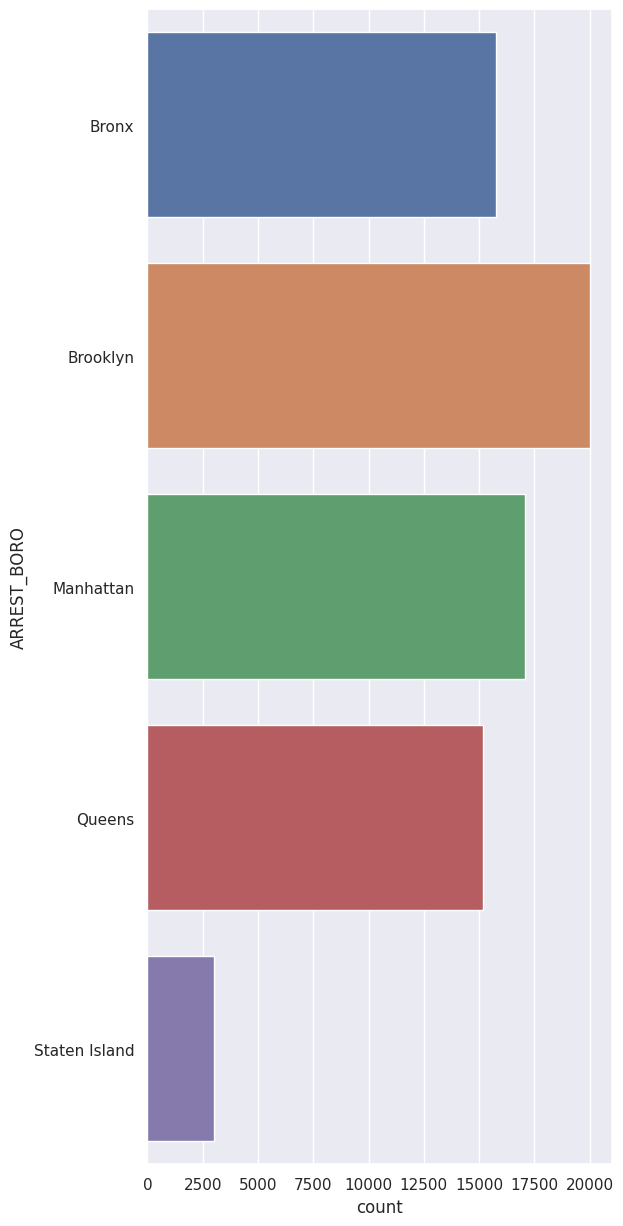

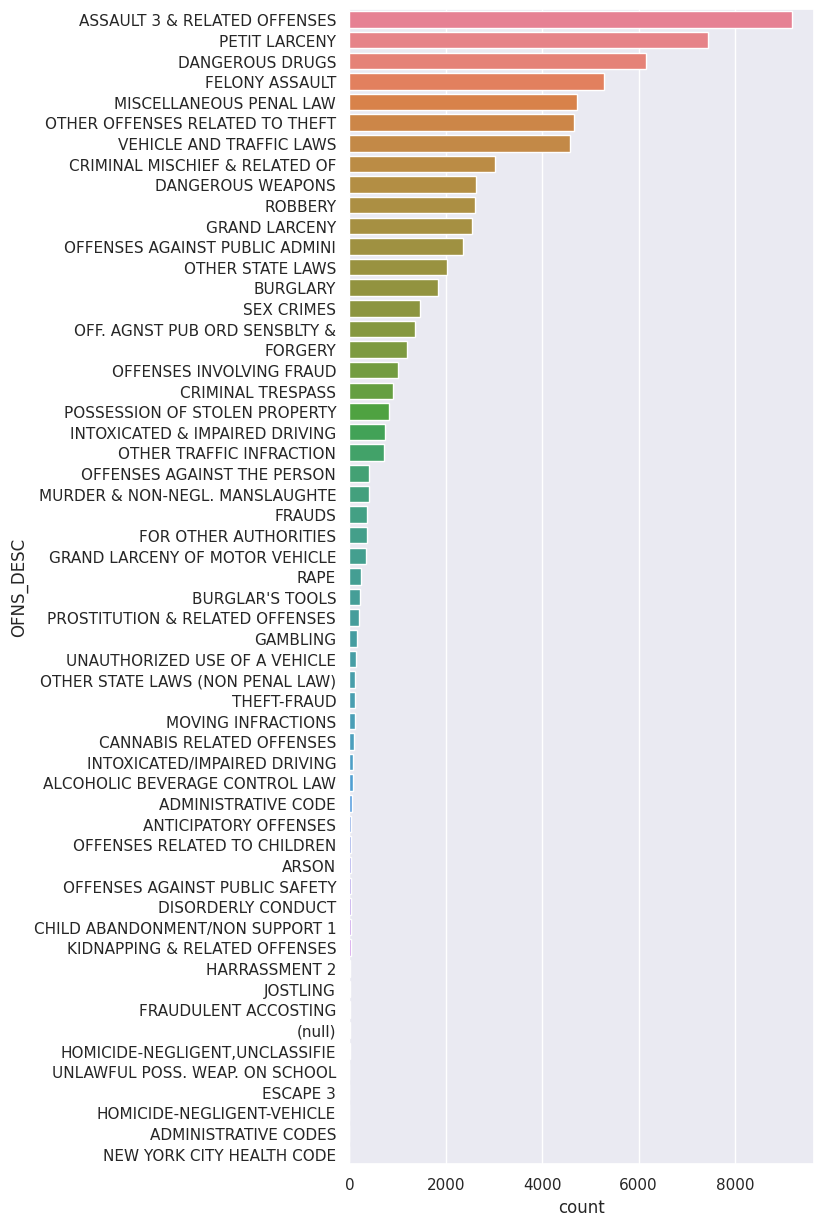

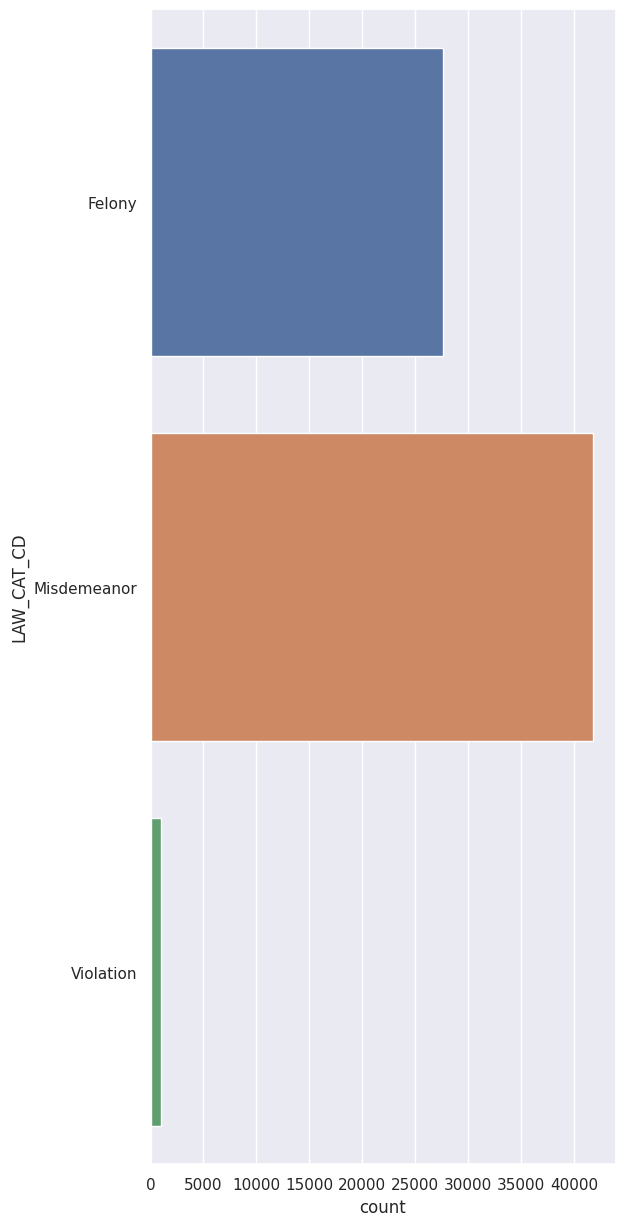

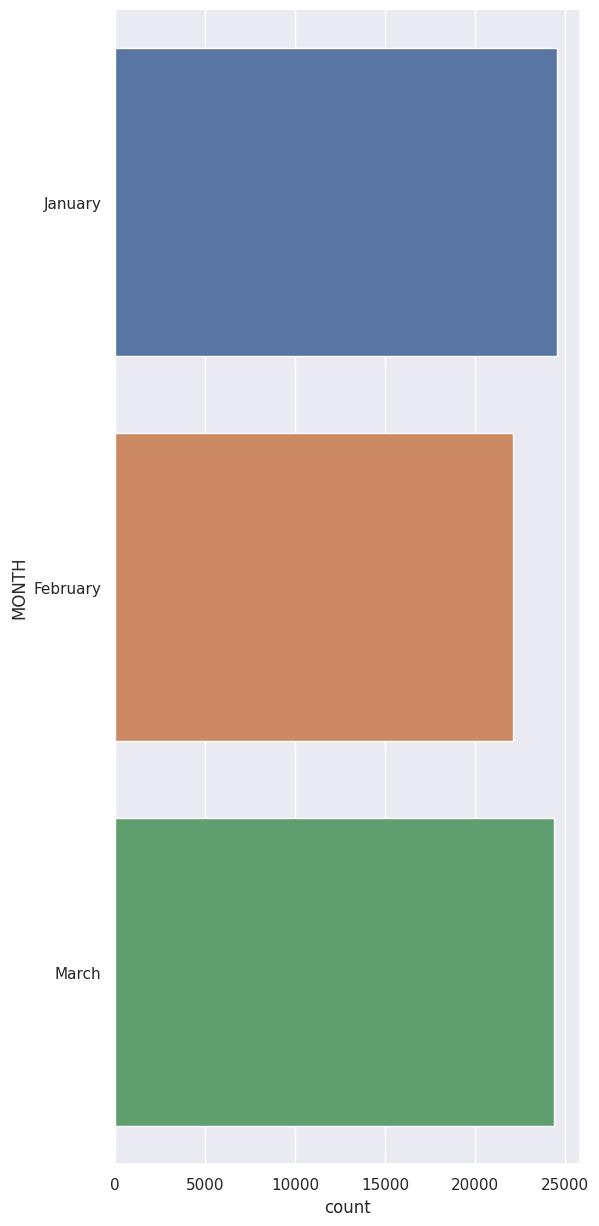

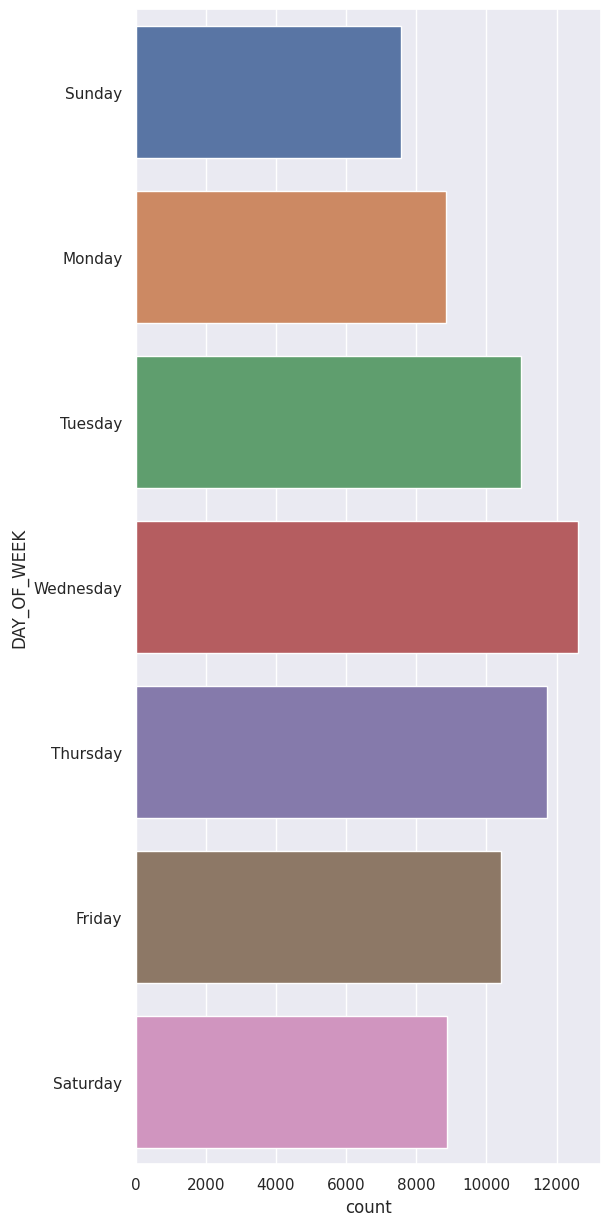

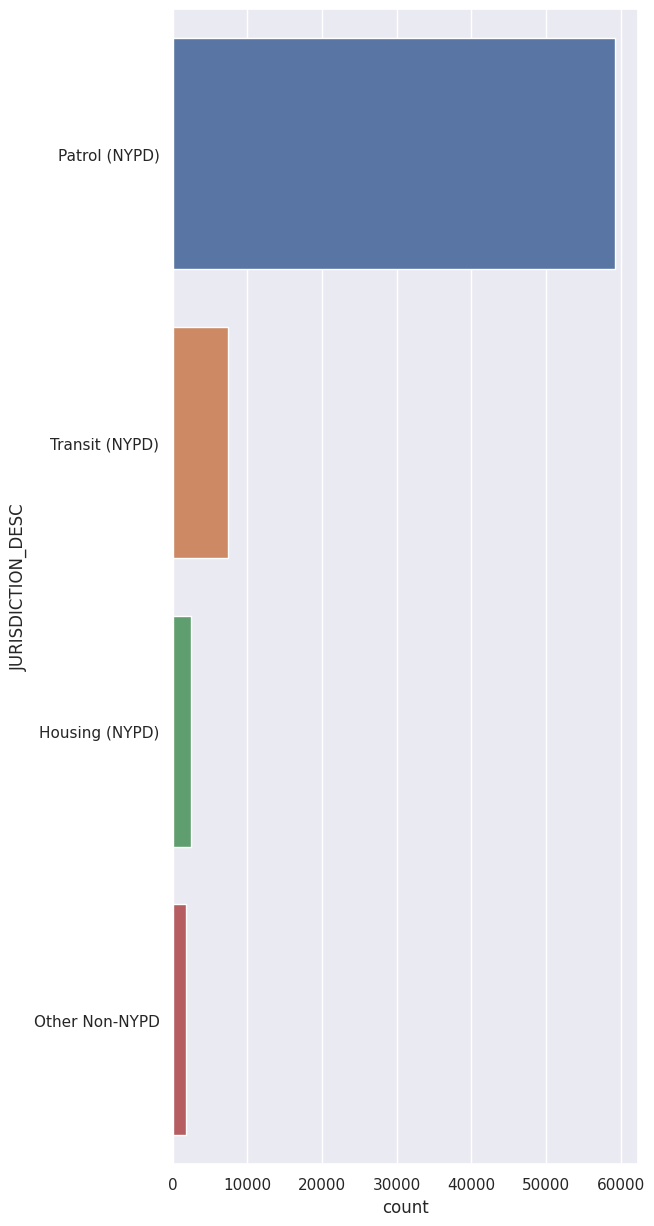

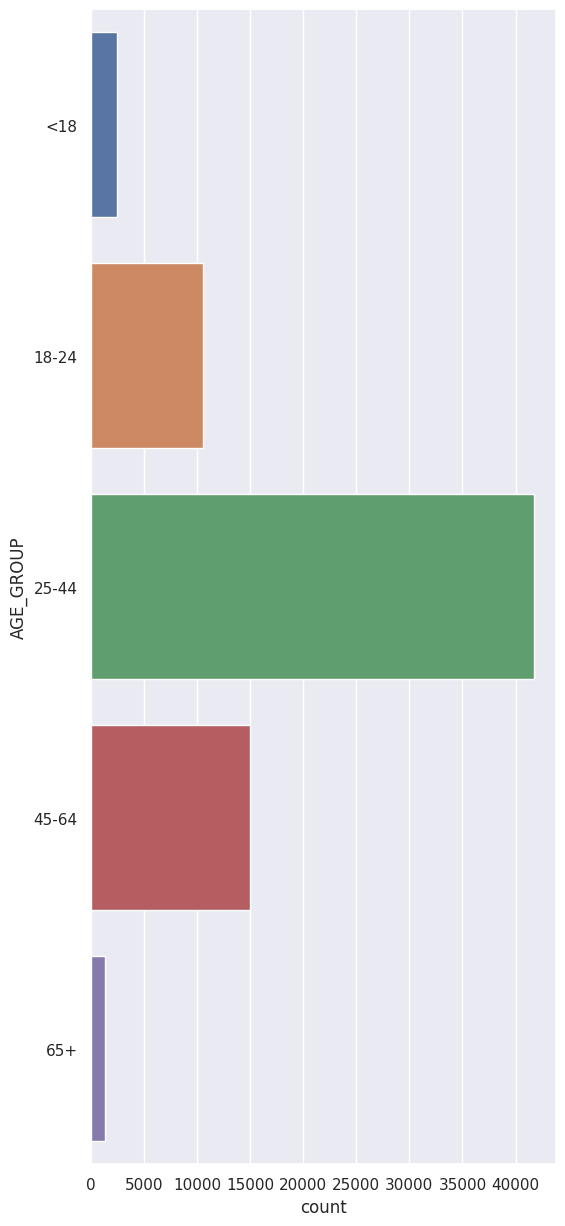

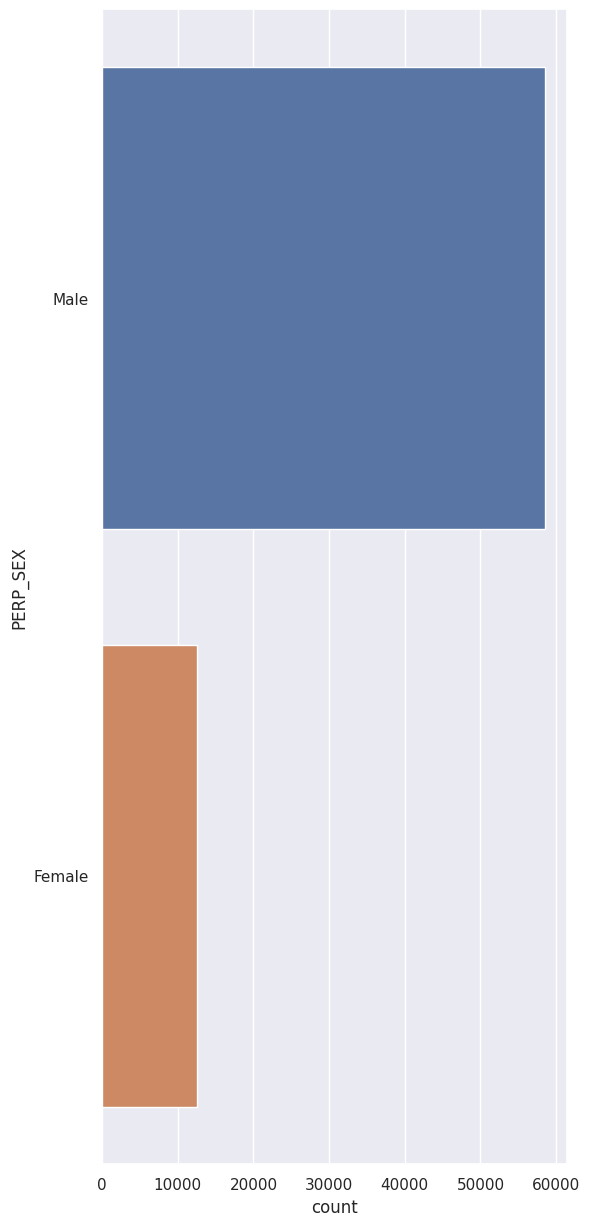

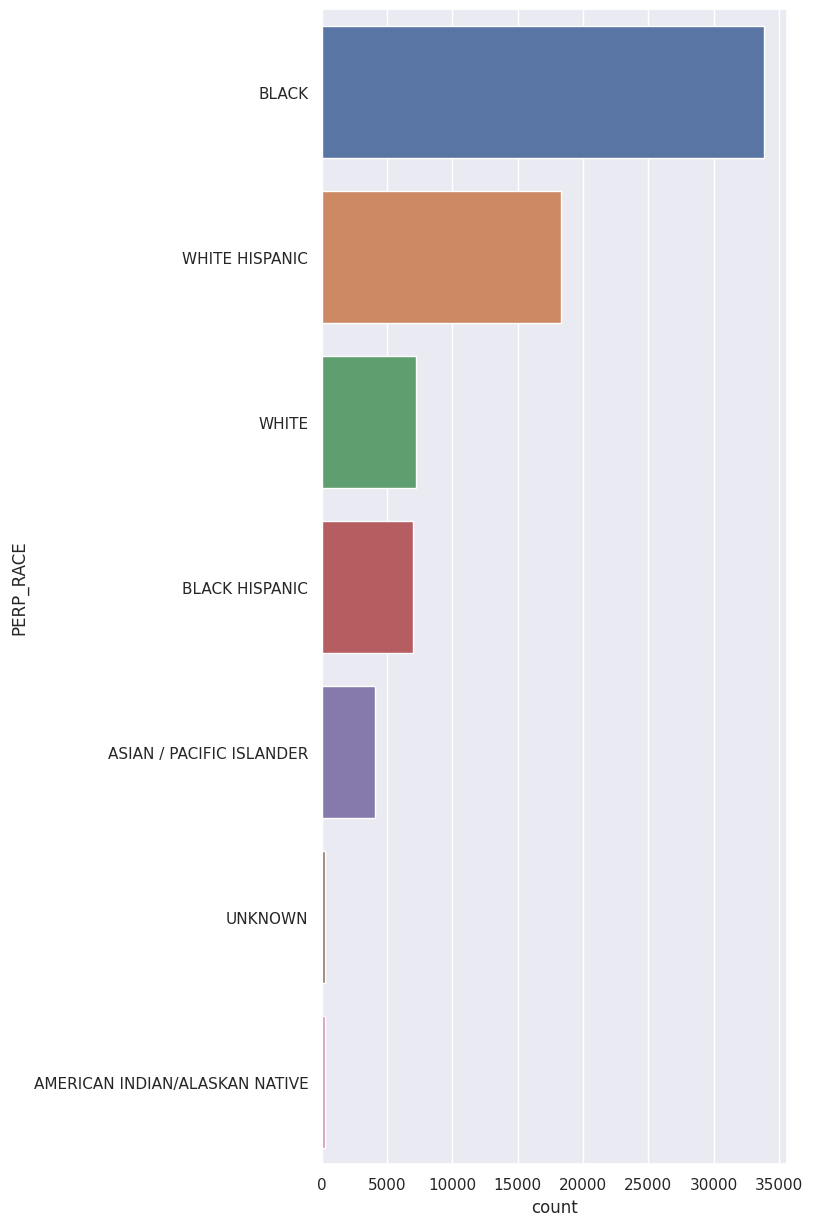

In [14]:
for c in df_adjusted[categorical_cols].columns:
    count = df[c].value_counts().reset_index()
    plt.figure(figsize=(6, 15))
    sns.barplot(count, x='count', y=c, hue=c)

## Numerical Aggregrations

In [15]:
useful_numerics = [col for col in df_adjusted.columns if df_adjusted[col].dtype in ['int64', 'float64']]

In [ ]:
for c in df_adjusted[useful_numerics].columns:
    print("Printing Mean, Median, Maximum, Minimum, for column: ", c)
    print("Mean: ", df_adjusted[c].mean().round(2))
    print("Median: ", df_adjusted[c].median())
    print("Maximum: ", df_adjusted[c].max())
    print("Minimum: ", df_adjusted[c].min())
    print("----------------------------------",'\n\n')

Printing Mean, Median, Maximum, Minimum, for column:  ARREST_PRECINCT
Mean:  63.5
Median:  62.0
Maximum:  123
Minimum:  1
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  JURISDICTION_CODE
Mean:  0.71
Median:  0.0
Maximum:  97
Minimum:  0
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  MIN_AGE
Mean:  29.29
Median:  25.0
Maximum:  65
Minimum:  0
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  MAX_AGE
Mean:  46.98
Median:  44.0
Maximum:  99
Minimum:  17
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  Latitude
Mean:  40.74
Median:  40.734711
Maximum:  40.910722
Minimum:  40.50039
---------------------------------- 


Printing Mean, Median, Maximum, Minimum, for column:  Longitude
Mean:  -73.92
Median:  -73.926159
Maximum:  -73.700719
Minimum:  -74.252488
---------------------------------- 




## Ploting

In [17]:
sns.set_theme()
sns.set_palette("pastel")


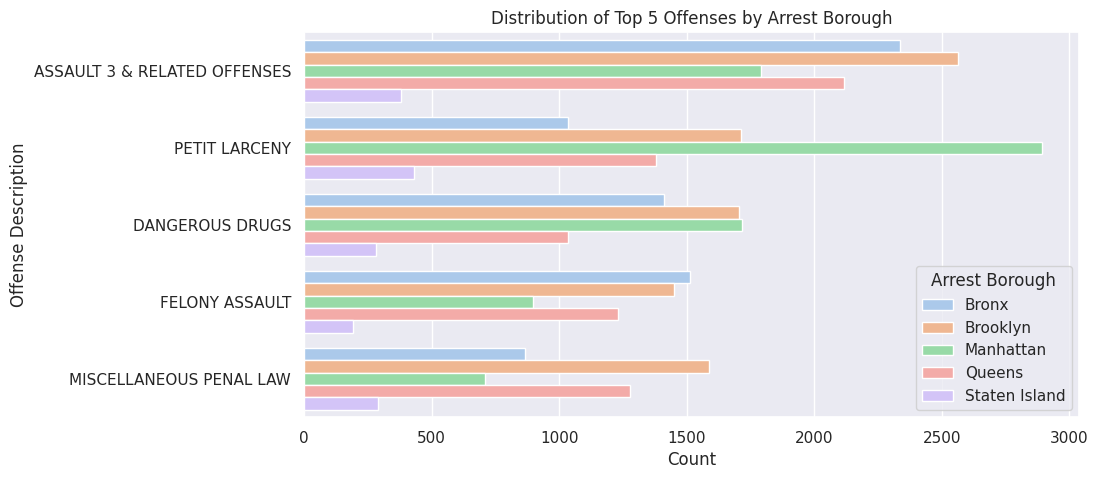

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='OFNS_DESC', hue='ARREST_BORO', order=df_adjusted['OFNS_DESC'].value_counts().index)
plt.title('Distribution of Top 5 Offenses by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Offense Description')
plt.legend(title='Arrest Borough')
plt.show()

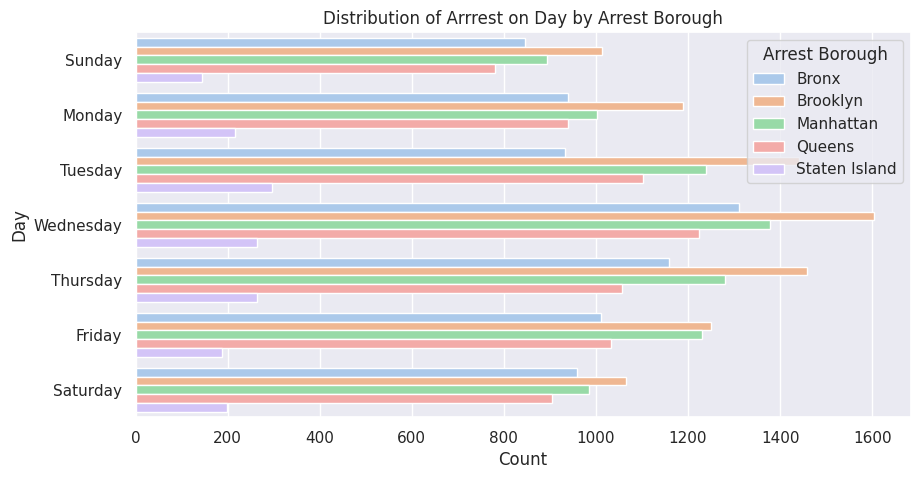

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='DAY_OF_WEEK', hue='ARREST_BORO', order=day_order)
plt.title('Distribution of Arrrest on Day by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Day')
plt.legend(title='Arrest Borough')
plt.show()

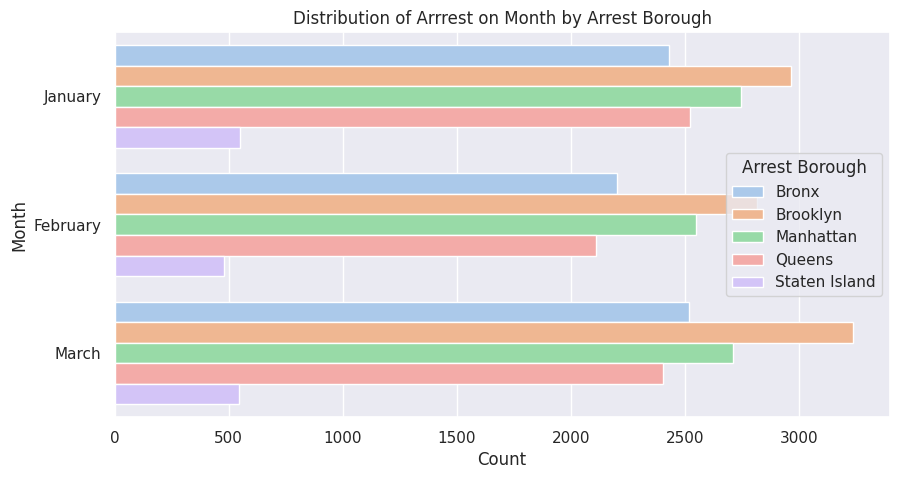

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='MONTH', hue='ARREST_BORO', order=month_order)
plt.title('Distribution of Arrrest on Month by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Month')
plt.legend(title='Arrest Borough')
plt.show()

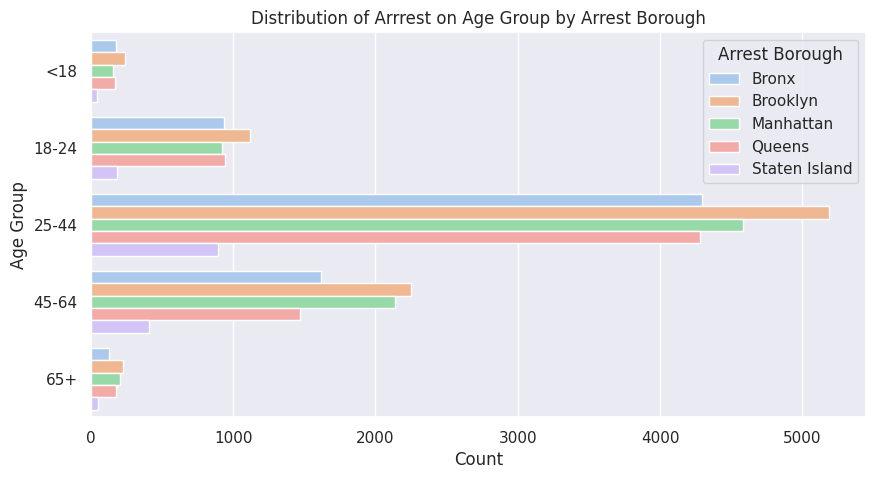

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='ARREST_BORO', order=desired_order)
plt.title('Distribution of Arrrest on Age Group by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Arrest Borough')
plt.show()

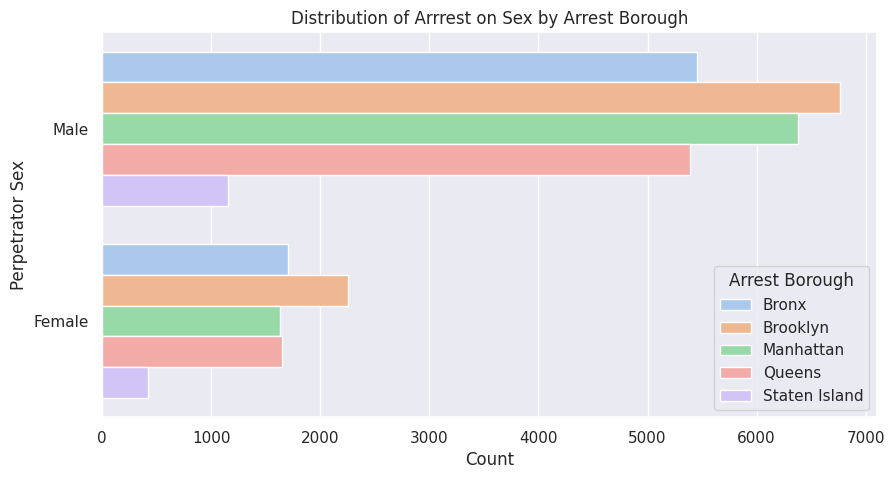

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='PERP_SEX', hue='ARREST_BORO', order=gender_order)
plt.title('Distribution of Arrrest on Sex by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Perpetrator Sex')
plt.legend(title='Arrest Borough')
plt.show()

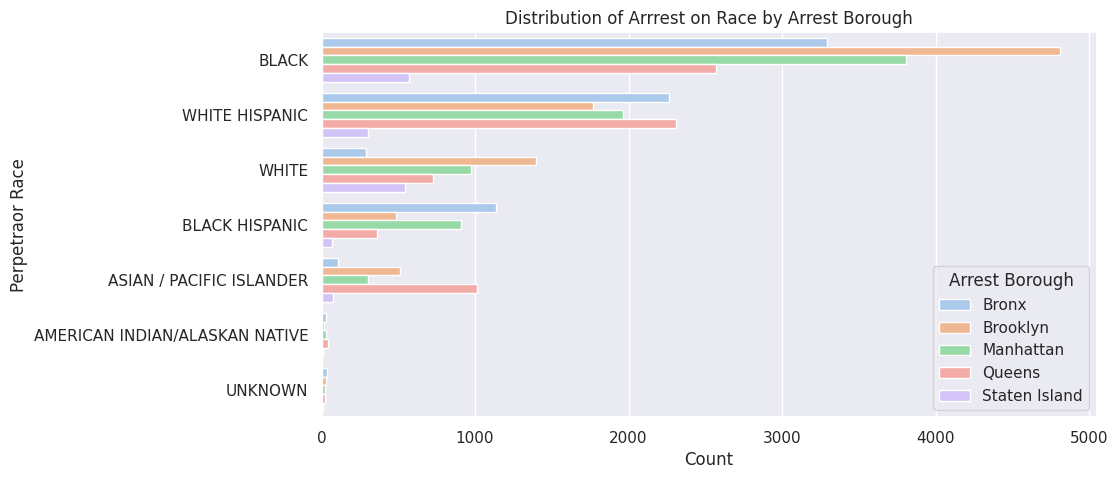

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='PERP_RACE', hue='ARREST_BORO', order=df_adjusted['PERP_RACE'].value_counts().index)
plt.title('Distribution of Arrrest on Race by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Perpetraor Race')
plt.legend(title='Arrest Borough')
plt.show()

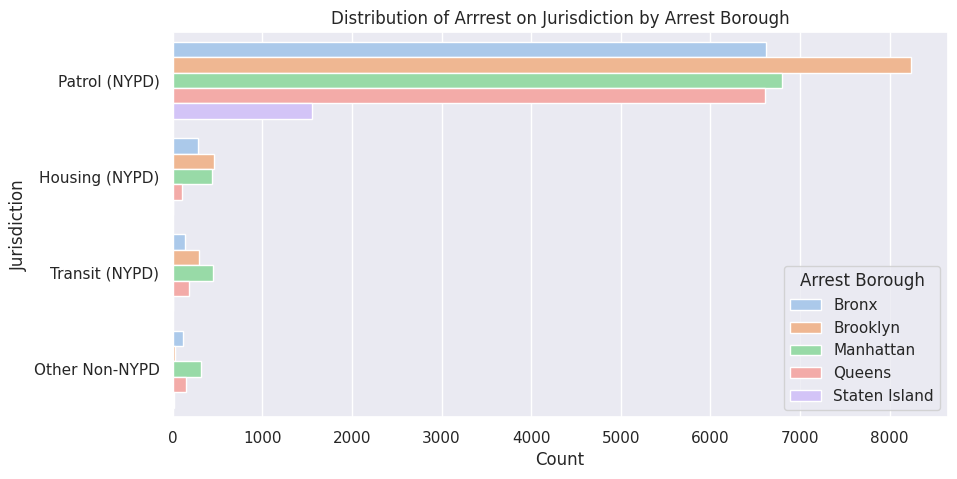

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='JURISDICTION_DESC', hue='ARREST_BORO', order=df_adjusted['JURISDICTION_DESC'].value_counts().index)
plt.title('Distribution of Arrrest on Jurisdiction by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Jurisdiction')
plt.legend(title='Arrest Borough')
plt.show()

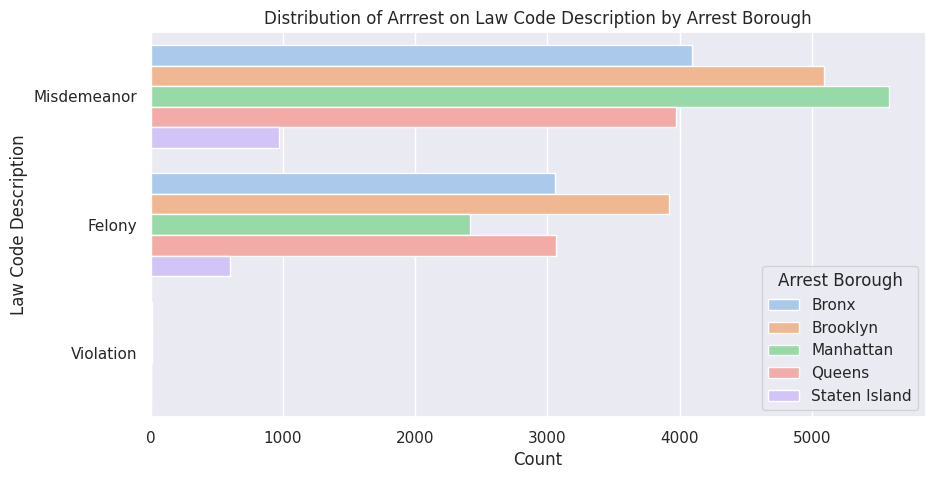

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='LAW_CAT_CD', hue='ARREST_BORO', order=df_adjusted['LAW_CAT_CD'].value_counts().index)
plt.title('Distribution of Arrrest on Law Code Description by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Law Code Description')
plt.legend(title='Arrest Borough')
plt.show()

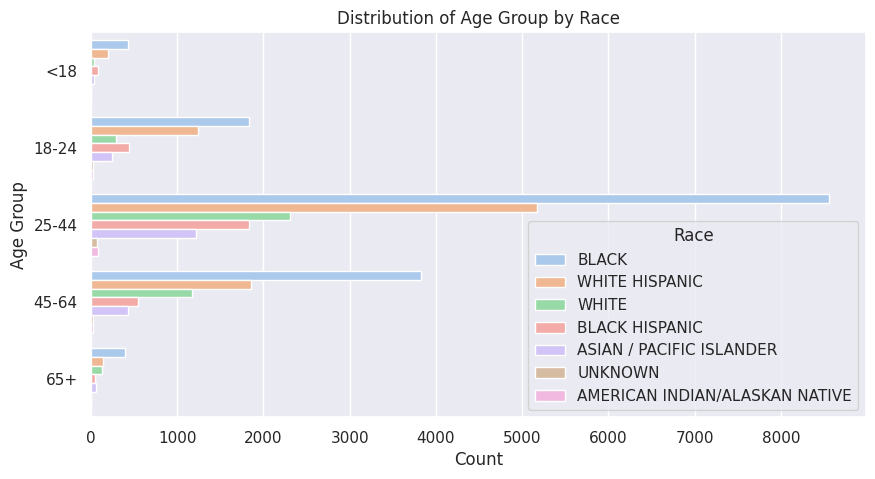

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='PERP_RACE', order=desired_order)
plt.title('Distribution of Age Group by Race')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Race')
plt.show()

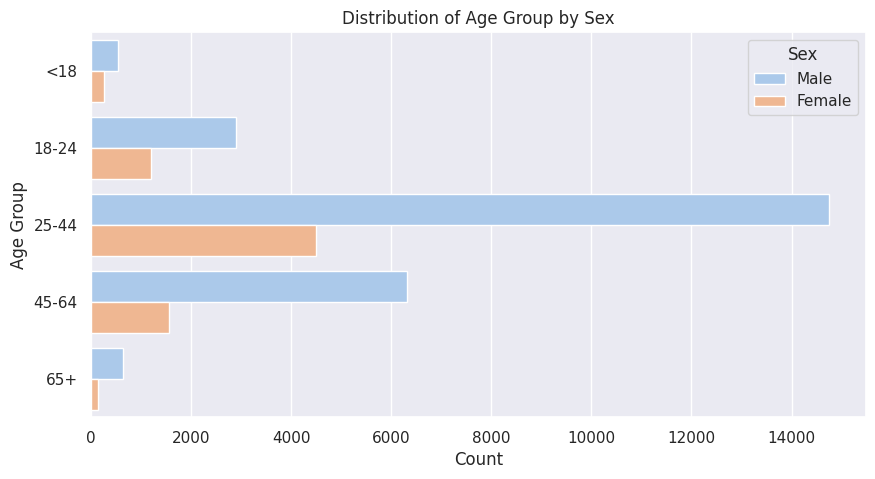

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='PERP_SEX', order=desired_order)
plt.title('Distribution of Age Group by Sex')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Sex')
plt.show()

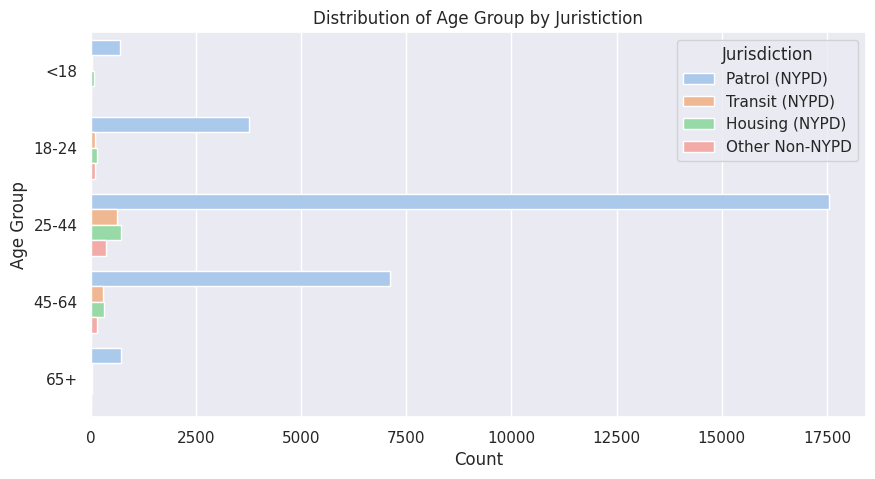

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='JURISDICTION_DESC', order=desired_order)
plt.title('Distribution of Age Group by Juristiction')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Jurisdiction')
plt.show()

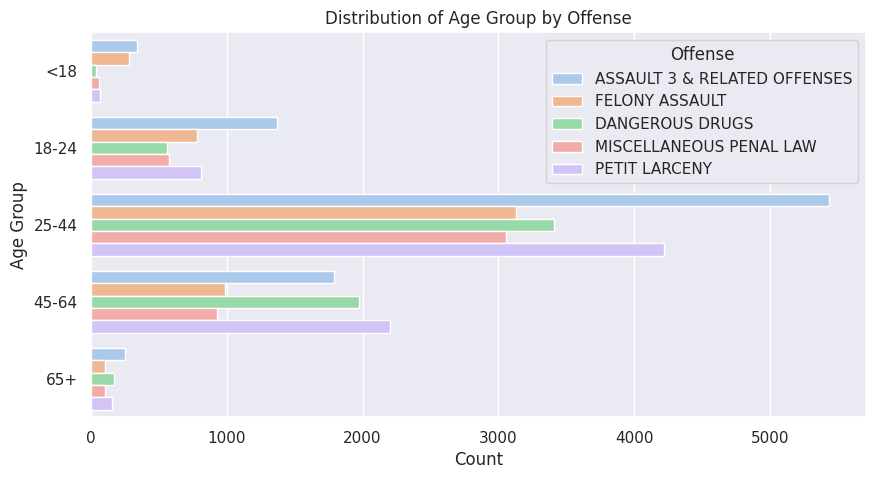

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='OFNS_DESC', order=desired_order)
plt.title('Distribution of Age Group by Offense')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Offense')
plt.show()

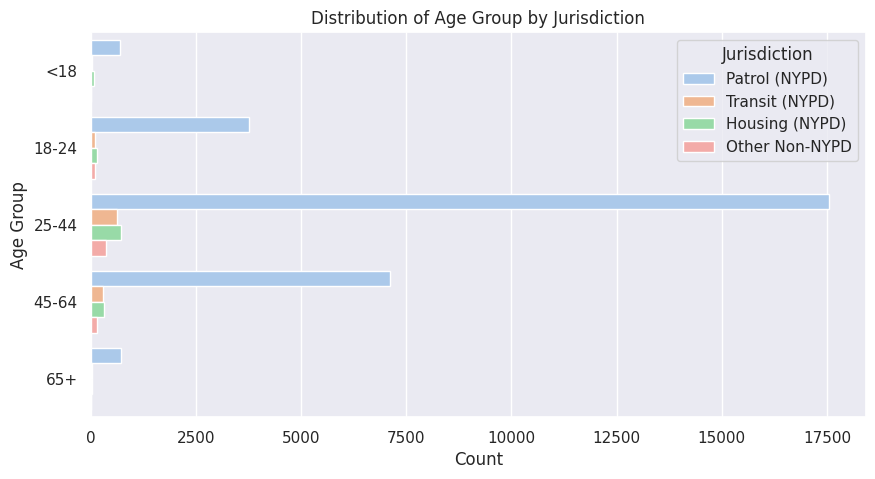

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='JURISDICTION_DESC', order=desired_order)
plt.title('Distribution of Age Group by Jurisdiction')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Jurisdiction')
plt.show()

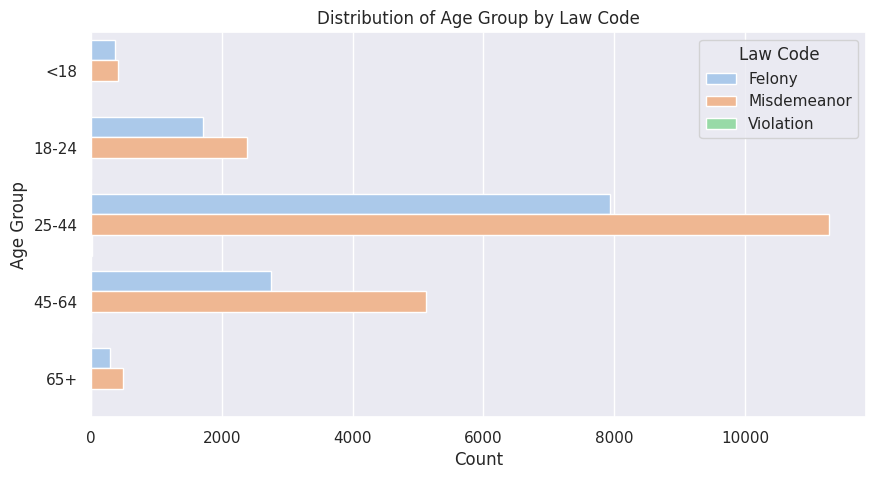

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='LAW_CAT_CD', order=desired_order)
plt.title('Distribution of Age Group by Law Code')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Law Code')
plt.show()

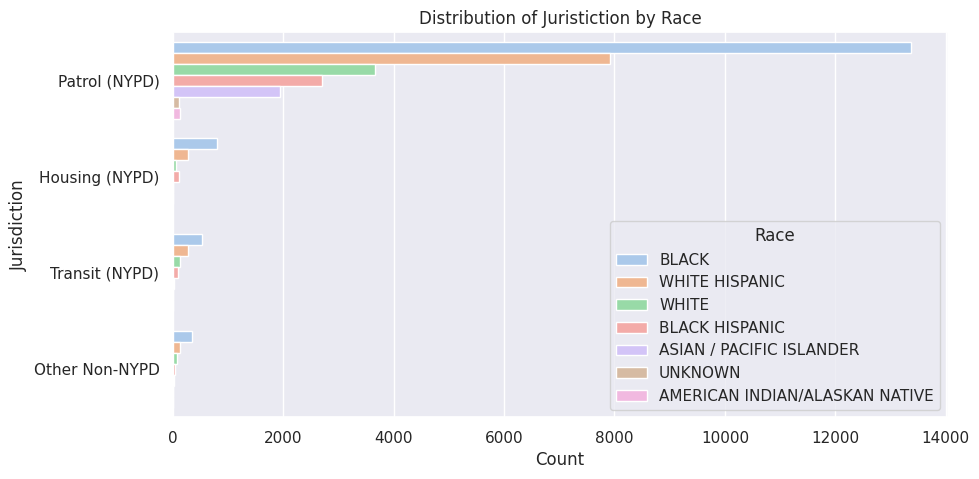

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='JURISDICTION_DESC', hue='PERP_RACE', order=df_adjusted['JURISDICTION_DESC'].value_counts().index)
plt.title('Distribution of Juristiction by Race')
plt.xlabel('Count')
plt.ylabel('Jurisdiction')
plt.legend(title='Race')
plt.show()

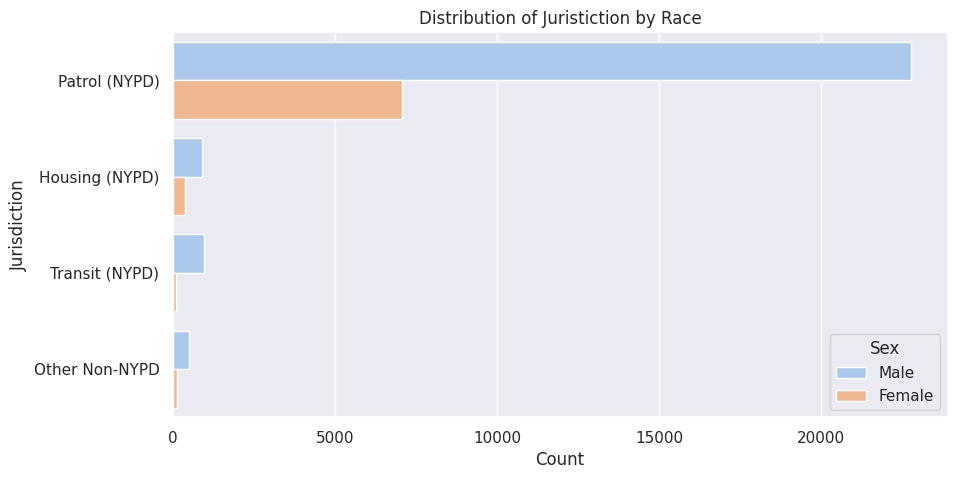

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='JURISDICTION_DESC', hue='PERP_SEX', order=df_adjusted['JURISDICTION_DESC'].value_counts().index)
plt.title('Distribution of Juristiction by Race')
plt.xlabel('Count')
plt.ylabel('Jurisdiction')
plt.legend(title='Sex')
plt.show()

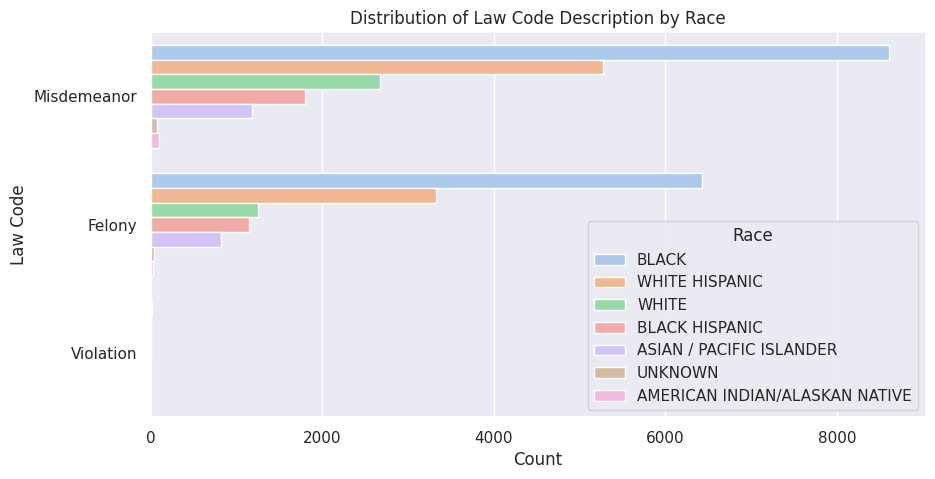

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='LAW_CAT_CD', hue='PERP_RACE', order=df_adjusted['LAW_CAT_CD'].value_counts().index)
plt.title('Distribution of Law Code Description by Race')
plt.xlabel('Count')
plt.ylabel('Law Code')
plt.legend(title='Race')
plt.show()

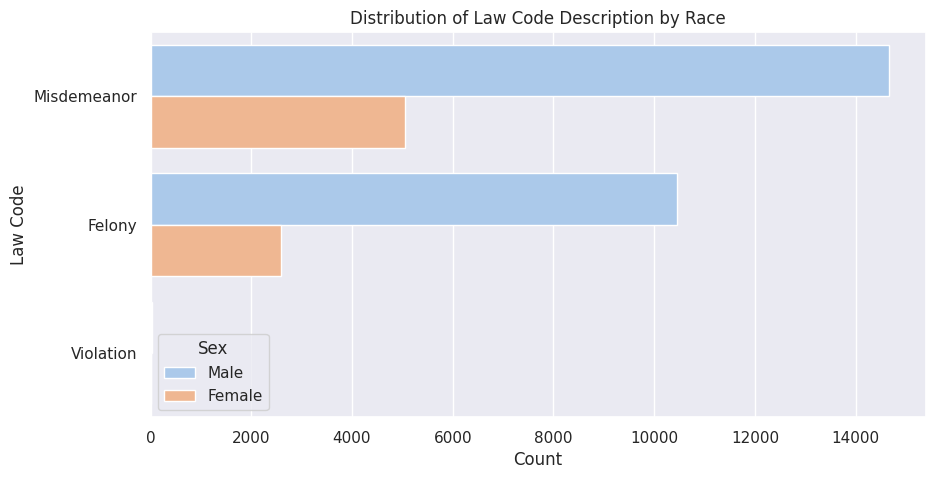

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_adjusted, y='LAW_CAT_CD', hue='PERP_SEX', order=df_adjusted['LAW_CAT_CD'].value_counts().index)
plt.title('Distribution of Law Code Description by Race')
plt.xlabel('Count')
plt.ylabel('Law Code')
plt.legend(title='Sex')
plt.show()

## Stats Testing

In [36]:
from scipy import stats

<Axes: xlabel='OFNS_DESC', ylabel='ARREST_BORO'>

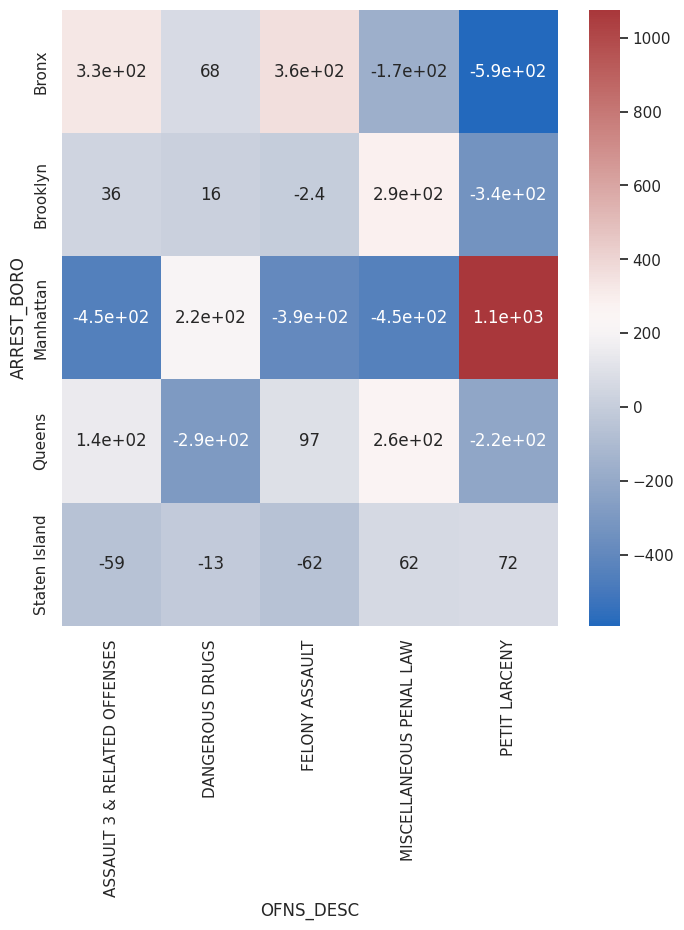

In [37]:
boro_table = pd.crosstab(df_adjusted['ARREST_BORO'], df_adjusted['OFNS_DESC'])
chi2 = stats.chi2_contingency(boro_table)
plt.figure(figsize = (8,8))
sns.heatmap(
    boro_table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

<Axes: xlabel='OFNS_DESC', ylabel='PERP_SEX'>

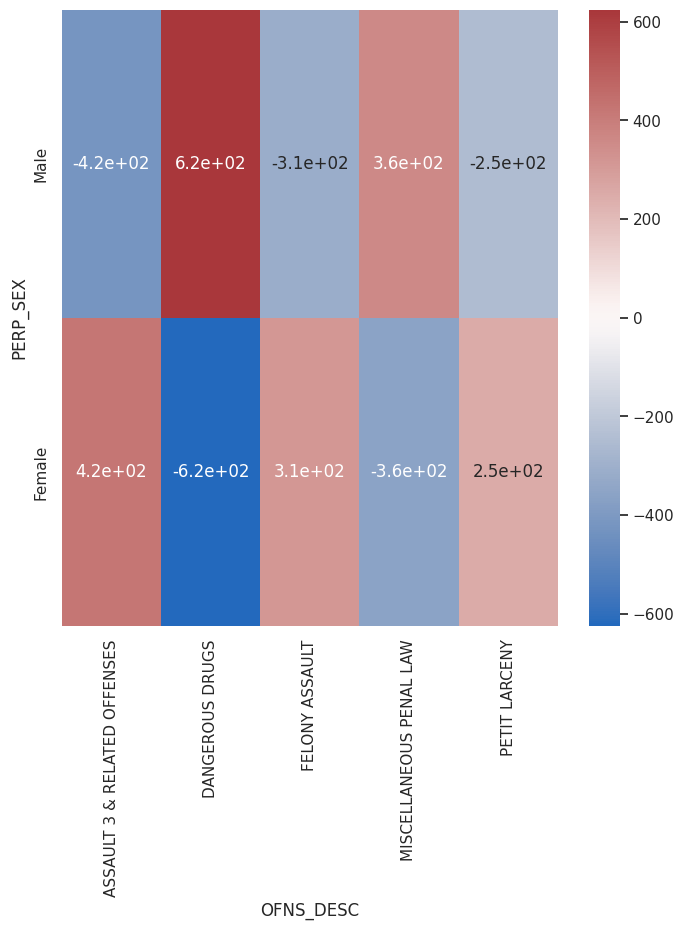

In [38]:
table = pd.crosstab(df_adjusted['PERP_SEX'], df_adjusted['OFNS_DESC'])
chi2 = stats.chi2_contingency(table)
plt.figure(figsize = (8,8))
sns.heatmap(
    table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

<Axes: xlabel='OFNS_DESC', ylabel='PERP_RACE'>

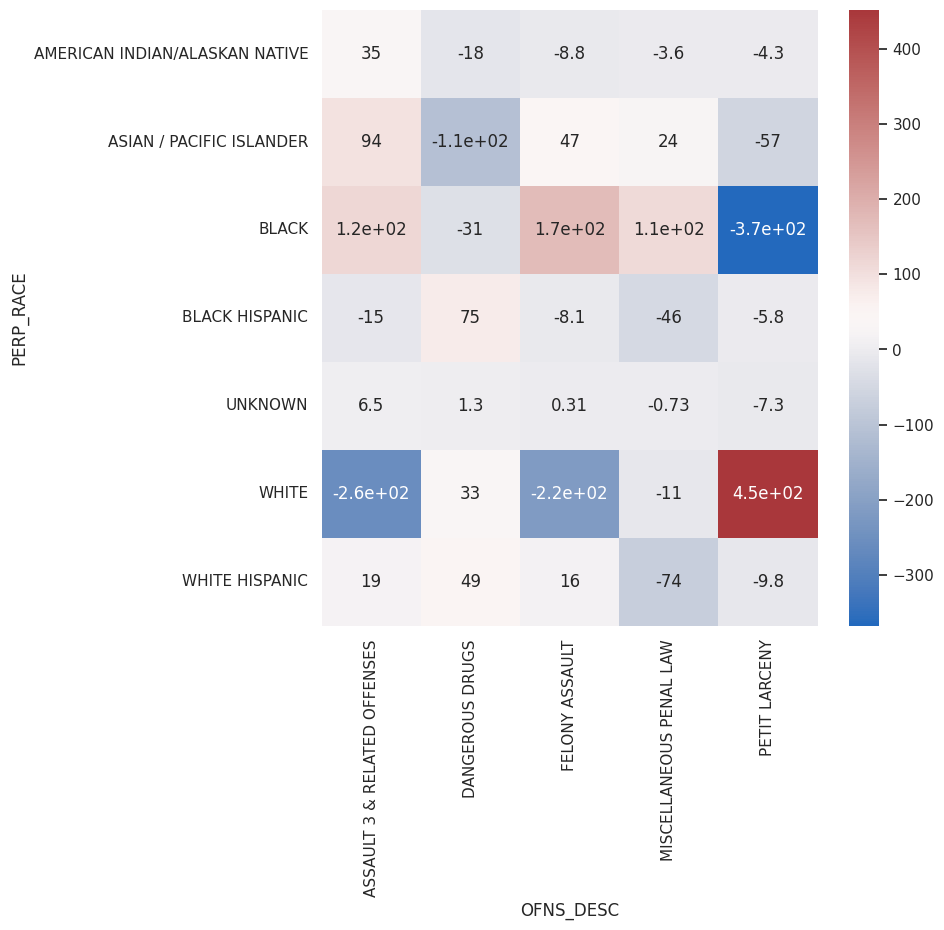

In [39]:
table = pd.crosstab(df_adjusted['PERP_RACE'], df_adjusted['OFNS_DESC'])
chi2 = stats.chi2_contingency(table)
plt.figure(figsize = (8,8))
sns.heatmap(
    table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

<Axes: xlabel='OFNS_DESC', ylabel='AGE_GROUP'>

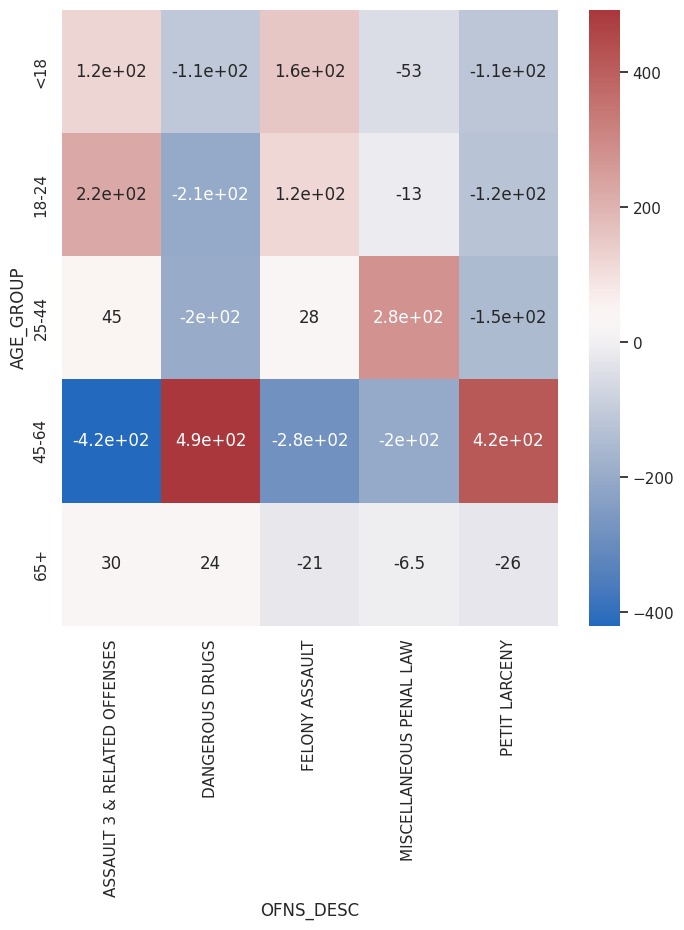

In [40]:
table = pd.crosstab(df_adjusted['AGE_GROUP'], df_adjusted['OFNS_DESC'])
chi2 = stats.chi2_contingency(table)
plt.figure(figsize = (8,8))
sns.heatmap(
    table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

## Machine Learning

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [42]:
df_adjusted

,ARREST_DATE,ARREST_BORO,OFNS_DESC,LAW_CAT_CD,MONTH,DAY_OF_WEEK,ARREST_PRECINCT,JURISDICTION_CODE,JURISDICTION_DESC,AGE_GROUP,MIN_AGE,MAX_AGE,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2025-01-02 00:00:00.000000000,Manhattan,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,January,Thursday,23,0,Patrol (NYPD),25-44,25,44,Female,BLACK,40.794755,-73.942348
1,2025-01-07 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Tuesday,113,0,Patrol (NYPD),45-64,45,64,Male,BLACK,40.680086,-73.775931
5,2025-01-19 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Sunday,113,0,Patrol (NYPD),18-24,18,24,Male,BLACK,40.680086,-73.775931
6,2025-01-21 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Tuesday,101,0,Patrol (NYPD),45-64,45,64,Female,BLACK,40.589791,-73.788678
9,2025-02-05 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,February,Wednesday,103,0,Patrol (NYPD),25-44,25,44,Male,BLACK,40.707447,-73.792141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71009,2025-03-31 00:00:00.000000000,Manhattan,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,March,Monday,18,0,Patrol (NYPD),25-44,25,44,Male,BLACK,40.765399,-73.985704
71014,2025-03-27 00:00:00.000000000,Bronx,DANGEROUS DRUGS,Felony,March,Thursday,52,0,Patrol (NYPD),25-44,25,44,Male,BLACK HISPANIC,40.880876,-73.878052
71015,2025-03-30 00:00:00.000000000,Manhattan,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,March,Sunday,25,0,Patrol (NYPD),45-64,45,64,Female,BLACK,40.803073,-73.938371
71018,2025-03-31 00:00:00.000000000,Bronx,PETIT LARCENY,Misdemeanor,March,Monday,44,0,Patrol (NYPD),25-44,25,44,Female,WHITE HISPANIC,40.822631,-73.930944


In [43]:
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32793 entries, 0 to 71019
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ARREST_DATE        32793 non-null  object  
 1   ARREST_BORO        32793 non-null  category
 2   OFNS_DESC          32793 non-null  object  
 3   LAW_CAT_CD         32793 non-null  category
 4   MONTH              32793 non-null  category
 5   DAY_OF_WEEK        32793 non-null  category
 6   ARREST_PRECINCT    32793 non-null  int64   
 7   JURISDICTION_CODE  32793 non-null  int64   
 8   JURISDICTION_DESC  32793 non-null  object  
 9   AGE_GROUP          32793 non-null  category
 10  MIN_AGE            32793 non-null  int64   
 11  MAX_AGE            32793 non-null  int64   
 12  PERP_SEX           32793 non-null  category
 13  PERP_RACE          32793 non-null  object  
 14  Latitude           32793 non-null  float64 
 15  Longitude          32793 non-null  float64 
dtypes: catego

### KNN

In [44]:
target_column = 'OFNS_DESC'

feature_columns = df_adjusted.columns.to_list()
feature_columns.remove(target_column)

X = df_adjusted[feature_columns].copy()
y = df_adjusted[target_column].copy()

In [45]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [46]:
categorical_features = [col for col in X.columns if X[col].dtype == 'object' or X[col].dtype.name == 'category']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # In case you have columns not listed, though ideally all are covered
)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [49]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Model Accuracy: 0.5164

Classification Report:
                              precision    recall  f1-score   support

ASSAULT 3 & RELATED OFFENSES       0.59      0.58      0.59      1837
             DANGEROUS DRUGS       0.38      0.39      0.39      1229
              FELONY ASSAULT       0.48      0.44      0.46      1057
     MISCELLANEOUS PENAL LAW       0.51      0.48      0.49       946
               PETIT LARCENY       0.56      0.61      0.59      1490

                    accuracy                           0.52      6559
                   macro avg       0.50      0.50      0.50      6559
                weighted avg       0.52      0.52      0.52      6559


Confusion Matrix:


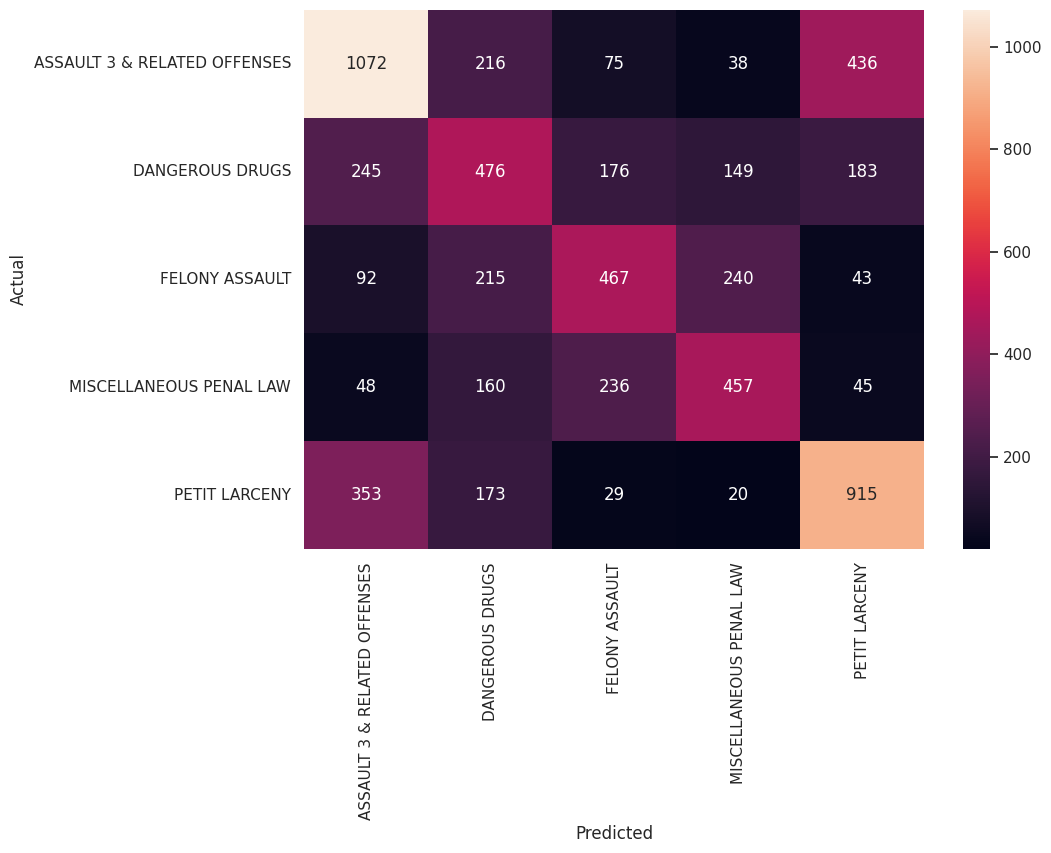

Model Accuracy: 0.4824

Classification Report:
                              precision    recall  f1-score   support

ASSAULT 3 & RELATED OFFENSES       0.50      0.75      0.60      1837
             DANGEROUS DRUGS       0.35      0.43      0.39      1229
              FELONY ASSAULT       0.46      0.39      0.42      1057
     MISCELLANEOUS PENAL LAW       0.52      0.28      0.37       946
               PETIT LARCENY       0.66      0.39      0.49      1490

                    accuracy                           0.48      6559
                   macro avg       0.50      0.45      0.45      6559
                weighted avg       0.50      0.48      0.47      6559


Confusion Matrix:


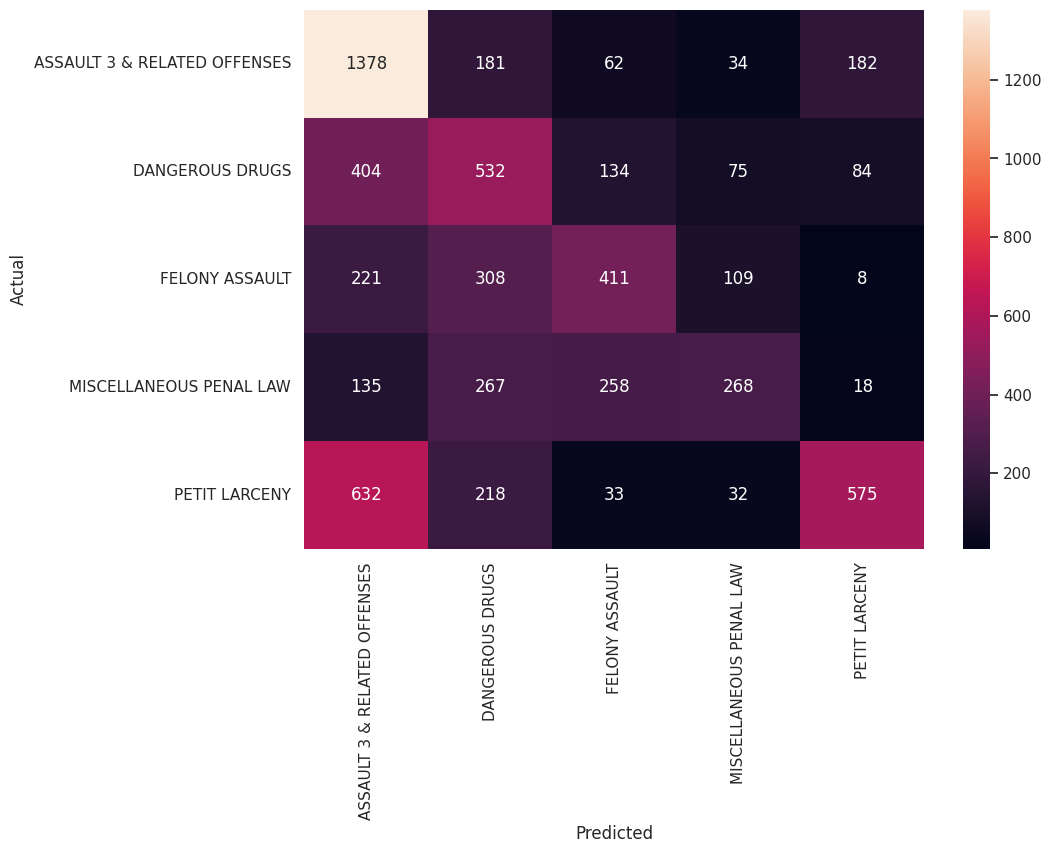

Model Accuracy: 0.4889

Classification Report:
                              precision    recall  f1-score   support

ASSAULT 3 & RELATED OFFENSES       0.48      0.68      0.56      1837
             DANGEROUS DRUGS       0.39      0.37      0.38      1229
              FELONY ASSAULT       0.49      0.35      0.40      1057
     MISCELLANEOUS PENAL LAW       0.52      0.37      0.43       946
               PETIT LARCENY       0.57      0.54      0.55      1490

                    accuracy                           0.49      6559
                   macro avg       0.49      0.46      0.47      6559
                weighted avg       0.49      0.49      0.48      6559


Confusion Matrix:


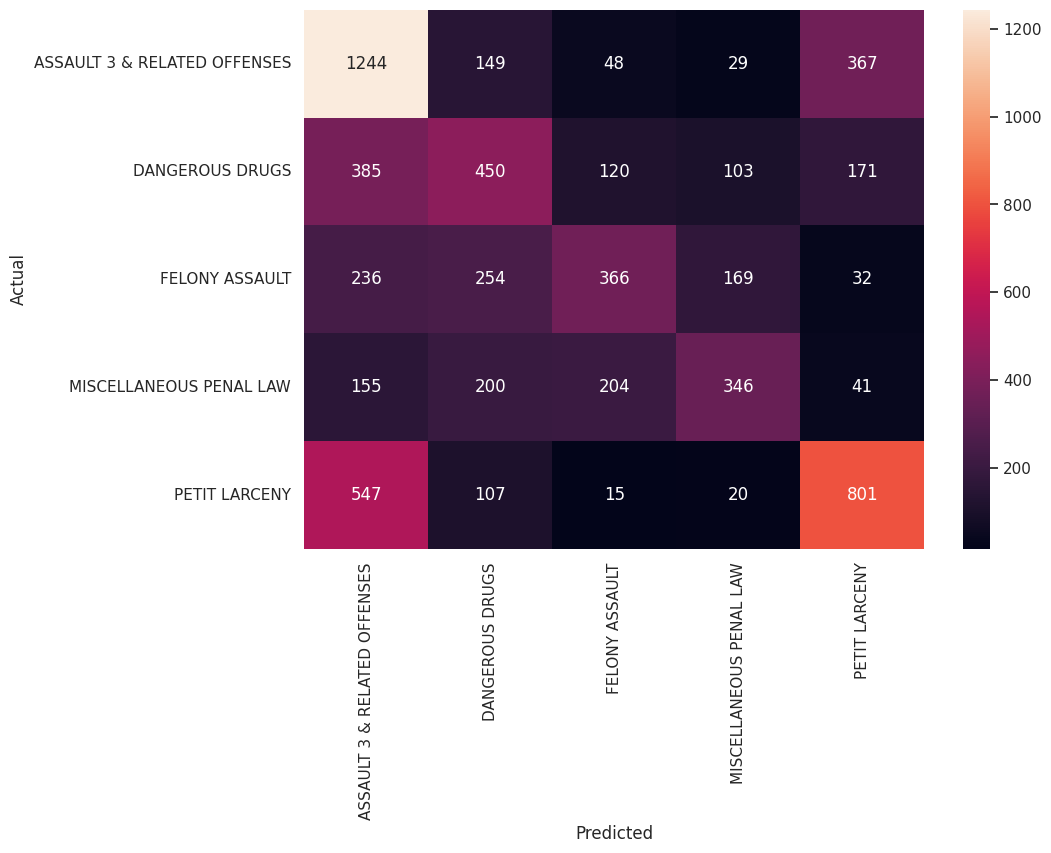

Model Accuracy: 0.4845

Classification Report:
                              precision    recall  f1-score   support

ASSAULT 3 & RELATED OFFENSES       0.50      0.68      0.57      1837
             DANGEROUS DRUGS       0.40      0.36      0.38      1229
              FELONY ASSAULT       0.49      0.40      0.44      1057
     MISCELLANEOUS PENAL LAW       0.48      0.36      0.41       946
               PETIT LARCENY       0.53      0.49      0.51      1490

                    accuracy                           0.48      6559
                   macro avg       0.48      0.46      0.46      6559
                weighted avg       0.48      0.48      0.48      6559


Confusion Matrix:


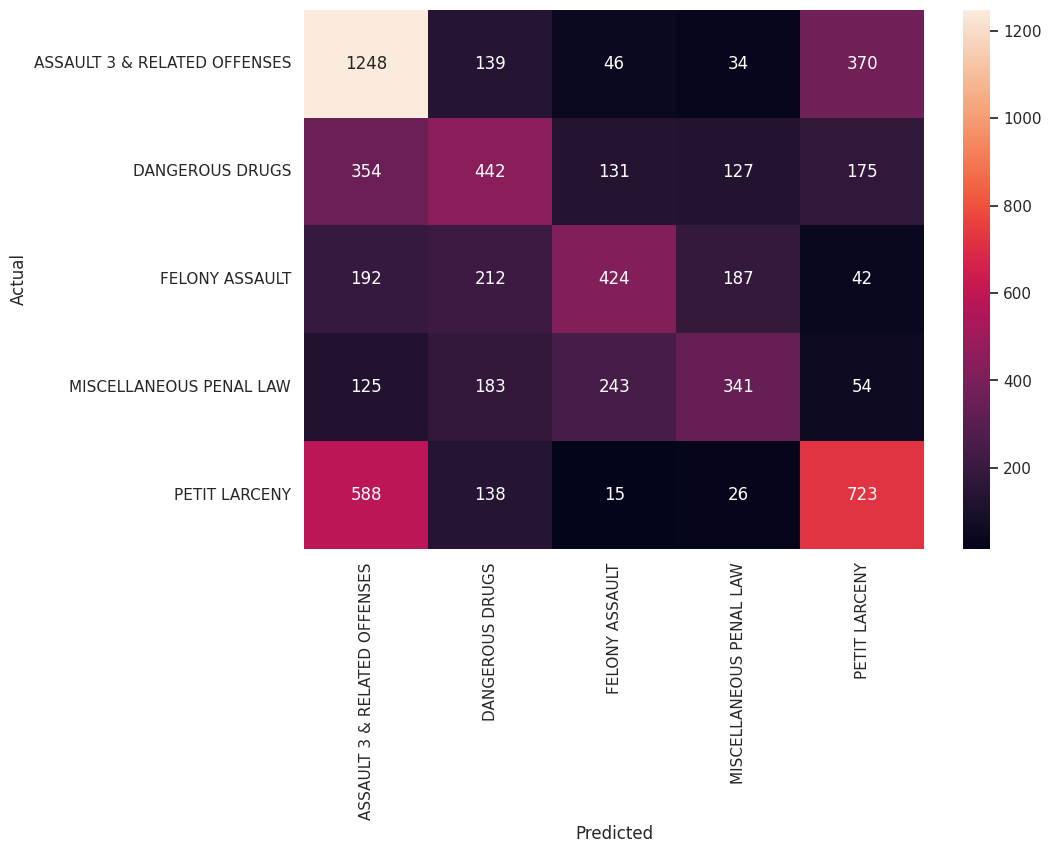

Model Accuracy: 0.4896

Classification Report:
                              precision    recall  f1-score   support

ASSAULT 3 & RELATED OFFENSES       0.51      0.67      0.58      1837
             DANGEROUS DRUGS       0.39      0.38      0.38      1229
              FELONY ASSAULT       0.49      0.40      0.44      1057
     MISCELLANEOUS PENAL LAW       0.49      0.35      0.41       946
               PETIT LARCENY       0.54      0.51      0.52      1490

                    accuracy                           0.49      6559
                   macro avg       0.48      0.46      0.47      6559
                weighted avg       0.49      0.49      0.48      6559


Confusion Matrix:


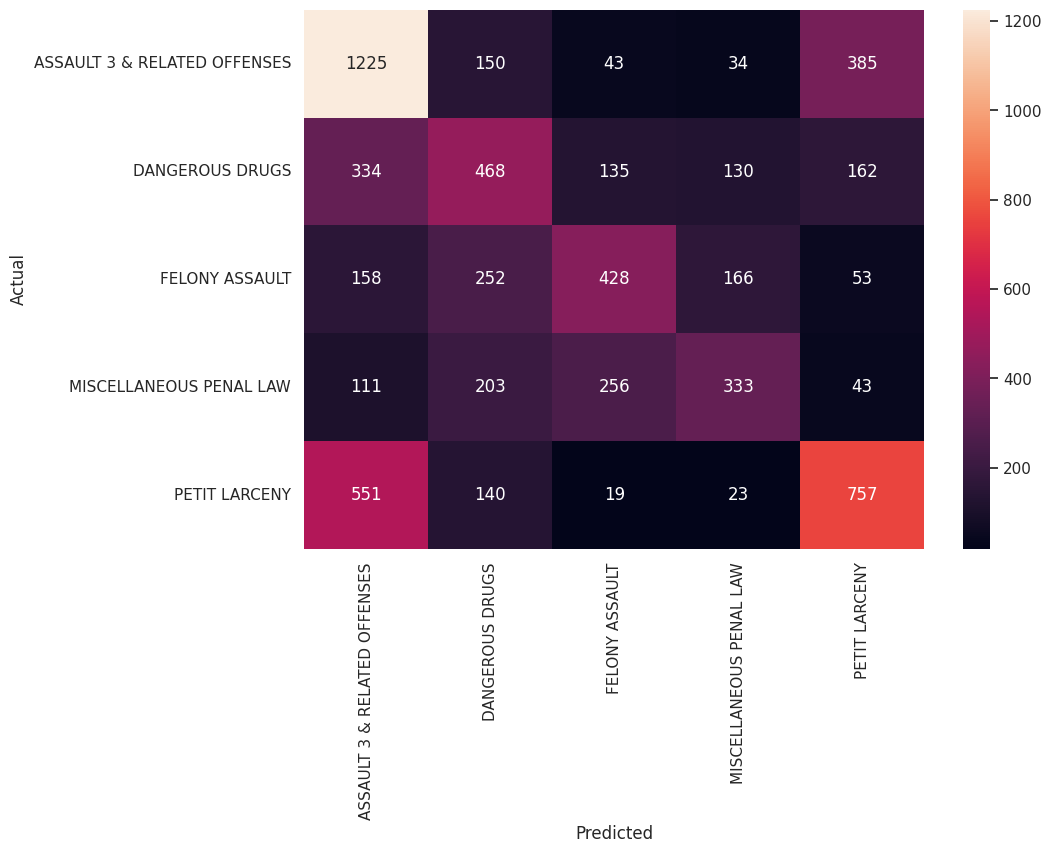

In [50]:
for i in range(1, 6):
    k_value = i
    knn_model = KNeighborsClassifier(n_neighbors=k_value)
    knn_model.fit(X_train_processed, y_train)
    
    y_pred = knn_model.predict(X_test_processed)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))


    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=le.transform(le.classes_))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Model Accuracy: 0.4824

Classification Report:
                              precision    recall  f1-score   support

ASSAULT 3 & RELATED OFFENSES       0.50      0.75      0.60      1837
             DANGEROUS DRUGS       0.35      0.43      0.39      1229
              FELONY ASSAULT       0.46      0.39      0.42      1057
     MISCELLANEOUS PENAL LAW       0.52      0.28      0.37       946
               PETIT LARCENY       0.66      0.39      0.49      1490

                    accuracy                           0.48      6559
                   macro avg       0.50      0.45      0.45      6559
                weighted avg       0.50      0.48      0.47      6559


Confusion Matrix:


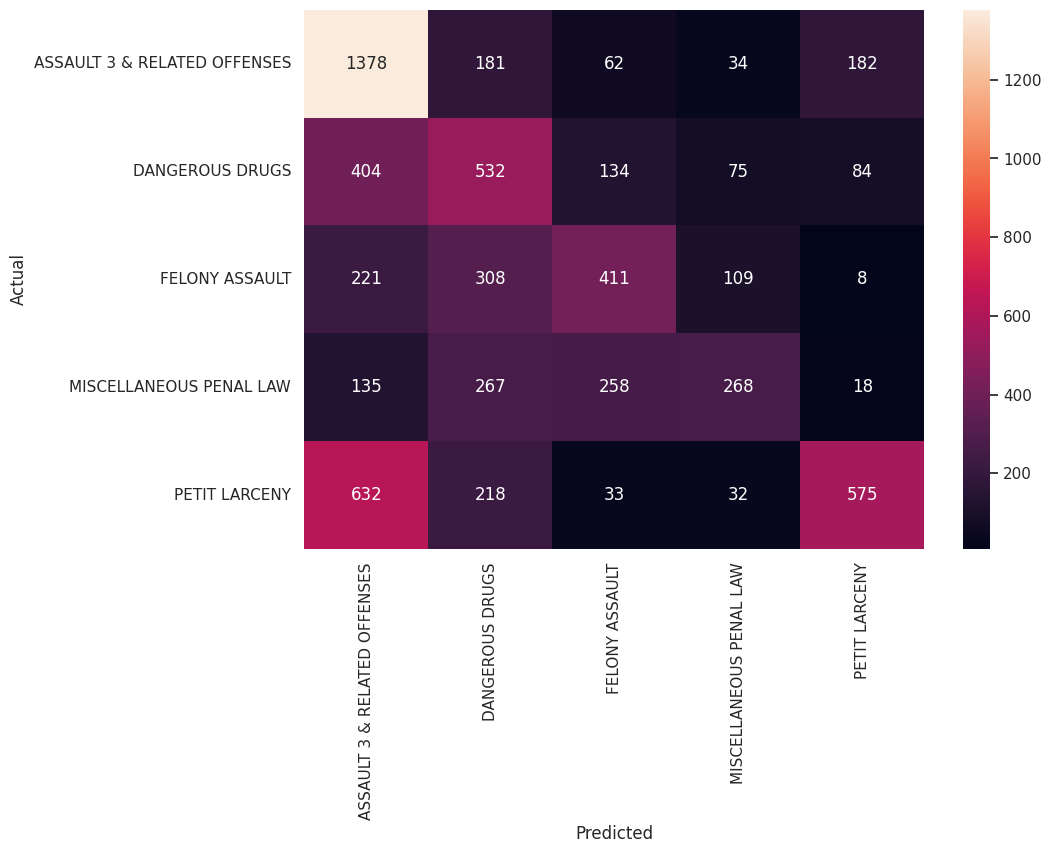

In [51]:
k_value = 2
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train_processed, y_train)

y_pred = knn_model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))


print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=le.transform(le.classes_))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Kmeans

In [52]:
from sklearn.cluster import KMeans

In [53]:
X_clustering = df_adjusted[feature_columns].copy()
categorical_features = [col for col in X_clustering.columns if X_clustering[col].dtype == 'object' or X_clustering[col].dtype.name == 'category']
numerical_features = [col for col in X_clustering.columns if X_clustering[col].dtype in ['int64', 'float64']]

In [54]:
preprocessor_clustering = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features), 
    ],
    remainder='passthrough'
)

In [55]:
X_processed_clustering = preprocessor_clustering.fit_transform(X_clustering)

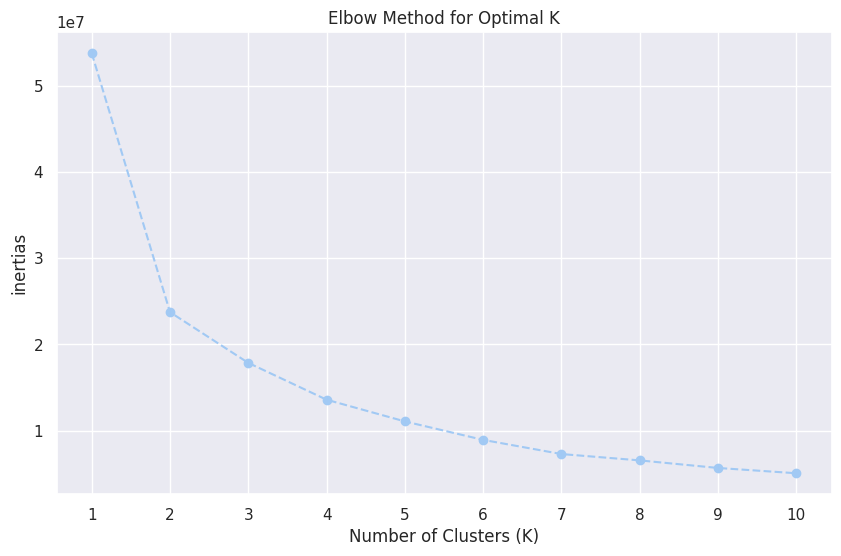

In [56]:
inertias = []
k_range = range(1, 11)

for i in k_range:
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow.fit(X_processed_clustering)
    inertias.append(kmeans_elbow.inertia_) # inertia_ is the WCSS

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('inertias')
plt.xticks(k_range)
plt.grid(True)
plt.show()

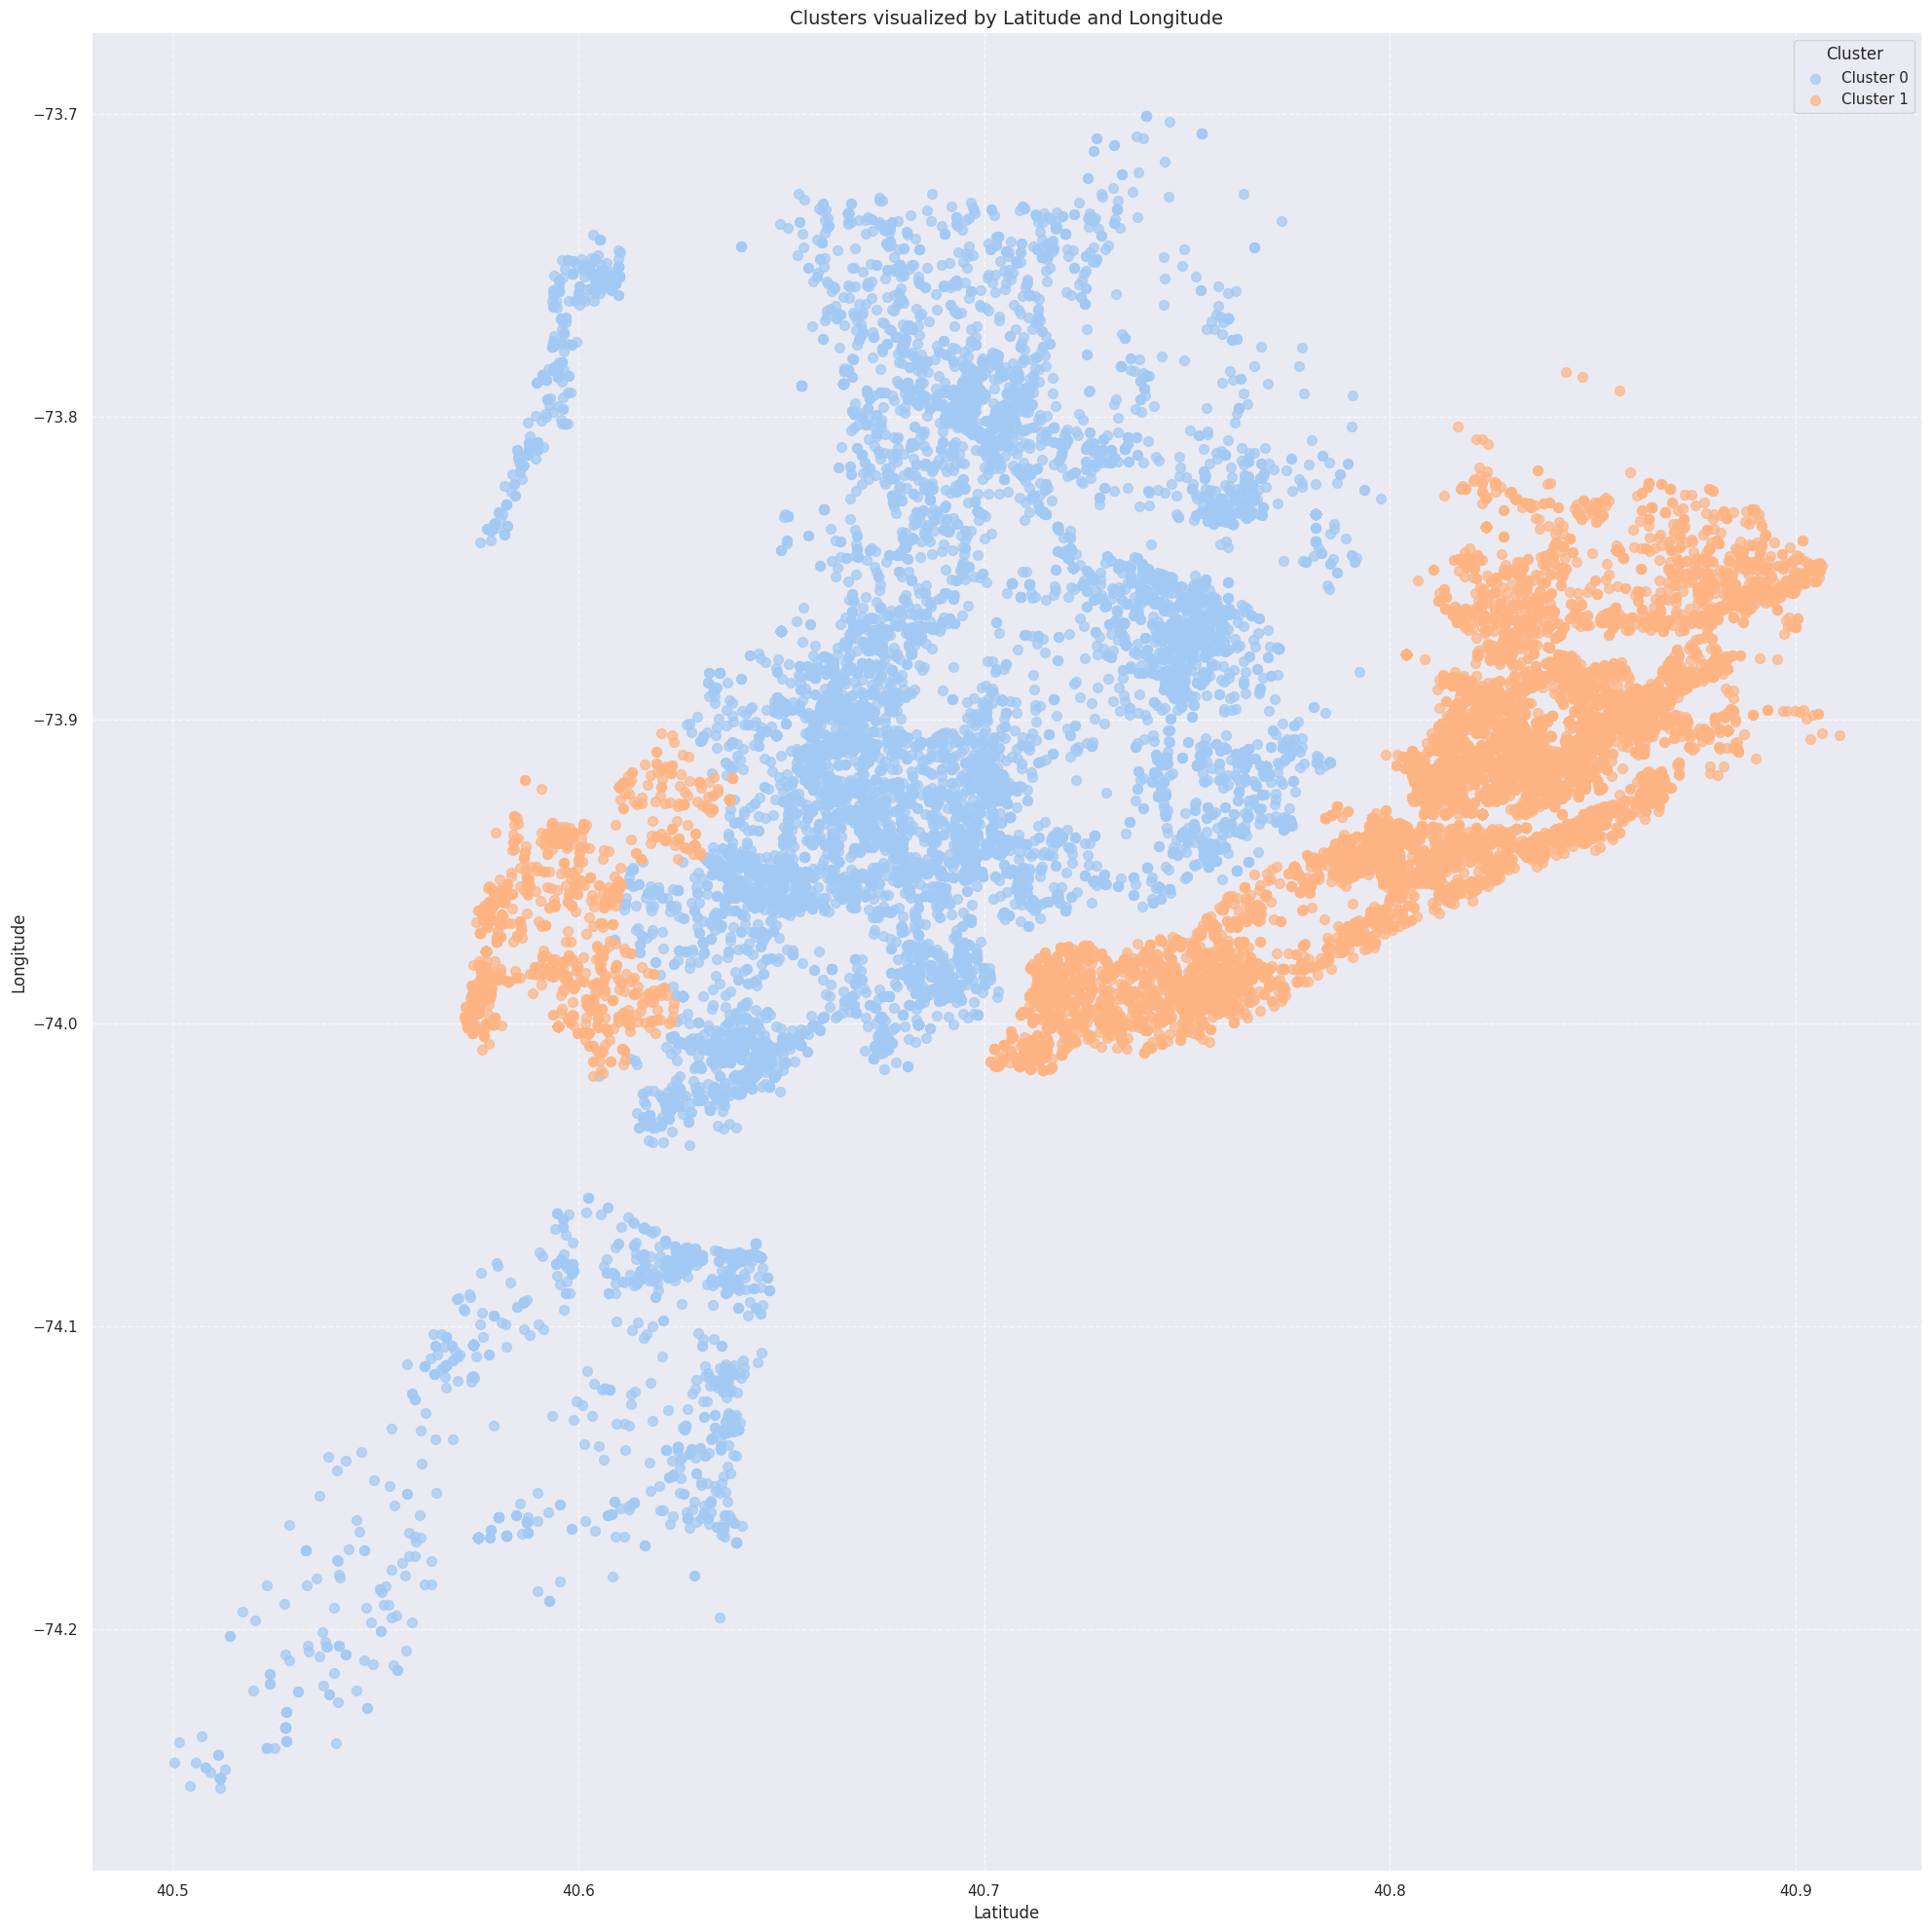

In [57]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')

X_processed_clustering = preprocessor_clustering.fit_transform(X_clustering)
cluster_labels = kmeans.fit_predict(X_processed_clustering)
df_kmeans = df_adjusted.copy()
df_kmeans['cluster'] = cluster_labels

plt.figure(figsize=(20, 20)) 
for cluster_id, group in df_kmeans.groupby('cluster'):
    plt.scatter(group['Latitude'], group['Longitude'], label=f'Cluster {cluster_id}', alpha=0.7, s=50)

plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.title('Clusters visualized by Latitude and Longitude', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_adjusted['Longitude'], df_adjusted['Latitude'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: 0.3137361528803444
Intercept: 63.928728991980634
R-squared: 0.08685015869953398
P-value: 0.0


In [59]:
df_adjusted

,ARREST_DATE,ARREST_BORO,OFNS_DESC,LAW_CAT_CD,MONTH,DAY_OF_WEEK,ARREST_PRECINCT,JURISDICTION_CODE,JURISDICTION_DESC,AGE_GROUP,MIN_AGE,MAX_AGE,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2025-01-02 00:00:00.000000000,Manhattan,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,January,Thursday,23,0,Patrol (NYPD),25-44,25,44,Female,BLACK,40.794755,-73.942348
1,2025-01-07 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Tuesday,113,0,Patrol (NYPD),45-64,45,64,Male,BLACK,40.680086,-73.775931
5,2025-01-19 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Sunday,113,0,Patrol (NYPD),18-24,18,24,Male,BLACK,40.680086,-73.775931
6,2025-01-21 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Tuesday,101,0,Patrol (NYPD),45-64,45,64,Female,BLACK,40.589791,-73.788678
9,2025-02-05 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,February,Wednesday,103,0,Patrol (NYPD),25-44,25,44,Male,BLACK,40.707447,-73.792141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71009,2025-03-31 00:00:00.000000000,Manhattan,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,March,Monday,18,0,Patrol (NYPD),25-44,25,44,Male,BLACK,40.765399,-73.985704
71014,2025-03-27 00:00:00.000000000,Bronx,DANGEROUS DRUGS,Felony,March,Thursday,52,0,Patrol (NYPD),25-44,25,44,Male,BLACK HISPANIC,40.880876,-73.878052
71015,2025-03-30 00:00:00.000000000,Manhattan,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,March,Sunday,25,0,Patrol (NYPD),45-64,45,64,Female,BLACK,40.803073,-73.938371
71018,2025-03-31 00:00:00.000000000,Bronx,PETIT LARCENY,Misdemeanor,March,Monday,44,0,Patrol (NYPD),25-44,25,44,Female,WHITE HISPANIC,40.822631,-73.930944


In [60]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_adjusted['JURISDICTION_CODE'], df_adjusted['ARREST_PRECINCT'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: -0.3169247158042713
Intercept: 63.72586507311752
R-squared: 0.0029928819197173576
P-value: 3.622548453964267e-23


In [61]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_adjusted['MIN_AGE'], df_adjusted['MAX_AGE'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: 1.2376041734904675
Intercept: 10.727103218401709
R-squared: 0.9245764983367776
P-value: 0.0


In [62]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_adjusted['ARREST_PRECINCT'], df_adjusted['MIN_AGE'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: -0.009570656871894902
Intercept: 29.899891636156653
R-squared: 0.0008240331817358154
P-value: 2.0015652418658598e-07


In [63]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_adjusted['ARREST_PRECINCT'], df_adjusted['MAX_AGE'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: -0.01098537227911874
Intercept: 47.67676580100104
R-squared: 0.0006553451436738008
P-value: 3.5454170744750752e-06


In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_adjusted['JURISDICTION_CODE'], df_adjusted['MIN_AGE'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: -0.037142187746002045
Intercept: 29.318368255737052
R-squared: 0.0003698056423050664
P-value: 0.0004966091667389557


In [65]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_adjusted['JURISDICTION_CODE'], df_adjusted['MAX_AGE'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: -0.061917759637975175
Intercept: 47.022903584026324
R-squared: 0.000620366529867621
P-value: 6.454565034366176e-06
